<a href="https://www.kaggle.com/code/dataranch/batting-model-comparison-eda?scriptVersionId=106682126" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**MLB Batting Data Baseline Model Comparison + Feature Importance 📊**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.
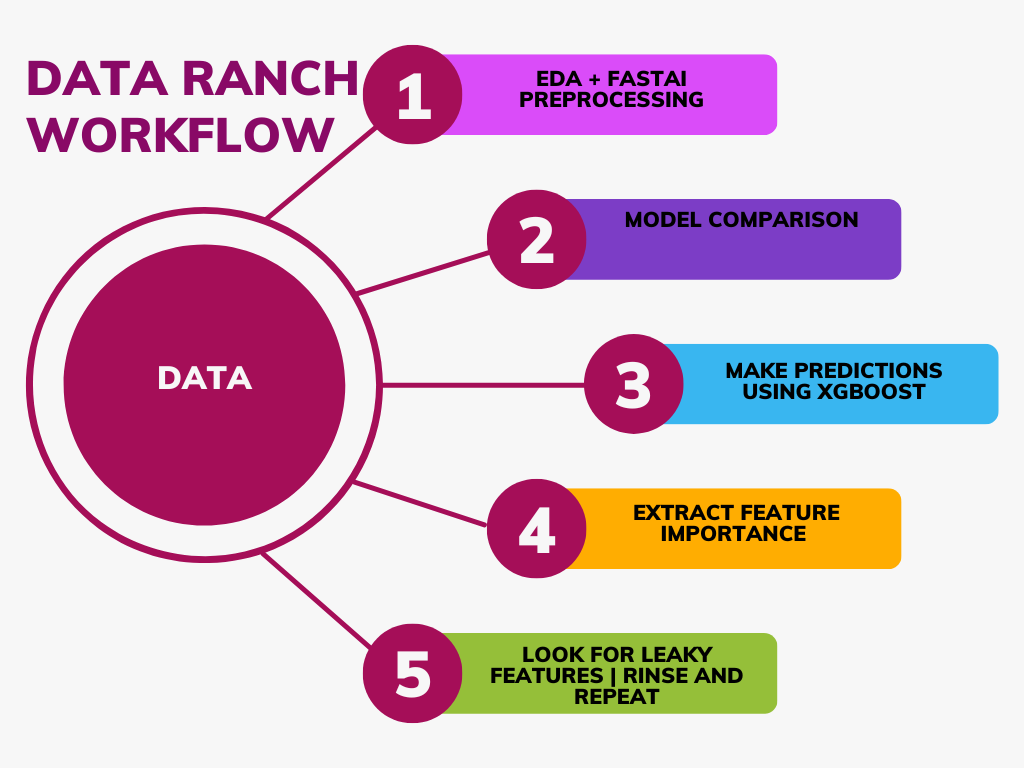

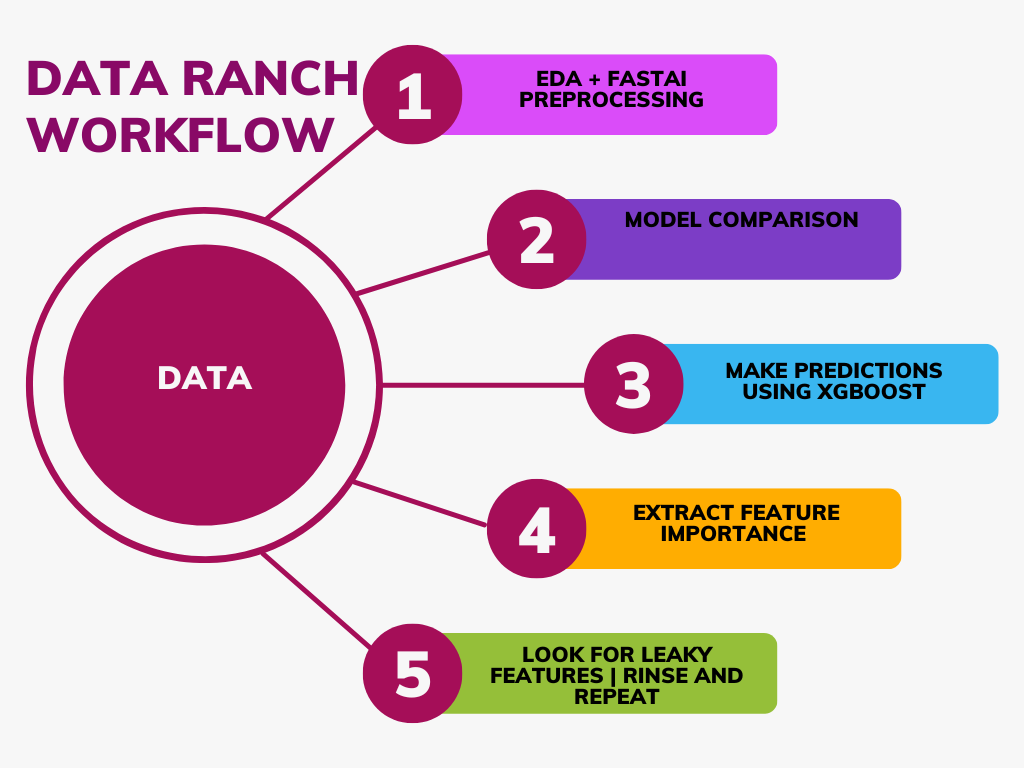

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.1 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.

In [4]:
!pip install fast-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.1 MB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'mlb-batting-exit-velocity-data-2015-2022'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 20000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
#rename any file in param_dir/file that ends with csv to data.csv
for file in os.listdir(input_dir):
    if file.endswith('.csv'):
        print('CSV!')
        if 'classification_results' not in file and 'regression_results' not in file:
            #os.rename(f'{input_dir}/{file}', f'{param_dir}/data.csv')
            shutil.copy(f'{input_dir}/{file}', f'{param_dir}/data.csv')
        #os.rename(f'{param_dir}/{file}', f'{param_dir}/data.csv')
try:
    df = pd.read_csv(f'{param_dir}/data.csv', nrows=SAMPLE_COUNT)
except:
    print(f'Please place a file named data.csv in {param_dir}')
    #sys.exit()

param_dir: /kaggle/working/mlb-batting-exit-velocity-data-2015-2022
CSV!


In [9]:
df

,id,rank,year,player,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,1,1,2022,"Judge, Aaron",341,14.60,37.80,118.40,95.80,100.20,89.10,465,205,413.00,210,61.60,20.30,91,26.70,15.80
1,2,2,2022,"Alvarez, Yordan",304,12.10,40.10,117.40,95.50,98.20,92.70,469,193,403.00,186,61.20,23.70,59,19.40,12.70
2,3,3,2022,"Trout, Mike",234,24.70,37.20,114.40,91.70,94.90,87.70,472,218,407.00,120,51.30,16.50,46,19.70,11.60
3,4,4,2022,"Schwarber, Kyle",312,18.90,34.60,114.80,93.30,99.70,87.20,468,197,415.00,170,54.50,17.60,64,20.50,11.50
4,5,5,2022,"Stanton, Giancarlo",228,10.20,26.30,119.80,94.60,98.20,94.10,445,160,400.00,117,51.30,17.80,42,18.40,11.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,1979,246,2015,"Peña, Brayan",302,8.00,24.80,104.90,85.60,86.90,85.80,378,137,NaN,52,17.20,8.90,1,0.30,0.30
1979,1980,247,2015,"Reyes, José",431,13.30,28.10,108.40,84.60,86.00,85.90,419,151,386.00,80,18.60,8.80,1,0.20,0.20
1980,1981,248,2015,"Sogard, Eric",326,11.60,32.20,107.50,85.50,86.50,85.90,410,155,410.00,61,18.70,10.10,1,0.30,0.20
1981,1982,249,2015,"Revere, Ben",536,5.10,34.90,111.40,83.10,86.00,81.30,389,133,367.00,78,14.60,8.20,0,0.00,0.00


In [10]:
df.isna().sum()

id                                     0
rank                                   0
year                                   0
player                                 0
batted_ball_events                     0
launch_angle                           0
sweet_spot_percentage                  0
max_ev                                 0
average_ev                             0
fly_ball_line_drive_ev                 0
ground_ball_ev                         0
max_distance                           0
average_distance                       0
average_homerun                        9
hard_hit_95mph+                        0
hard_hit_percentage                    0
hard_hit_swing_percentage              0
total_barrels                          0
barrels_batted_balls_percentage        0
barrels_plate_appearance_percentage    0
dtype: int64

<AxesSubplot:>

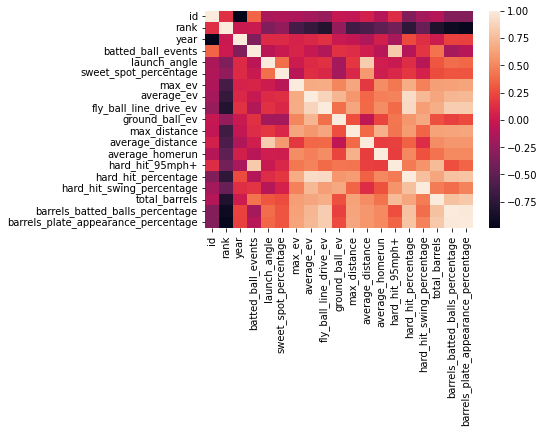

In [11]:
sns.heatmap(df.corr())

In [12]:
df.head().style.background_gradient(cmap = "inferno")

,id,rank,year,player,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,1,1,2022,"Judge, Aaron",341,14.60,37.80,118.40,95.80,100.20,89.10,465,205,413.00,210,61.60,20.30,91,26.70,15.80
1,2,2,2022,"Alvarez, Yordan",304,12.10,40.10,117.40,95.50,98.20,92.70,469,193,403.00,186,61.20,23.70,59,19.40,12.70
2,3,3,2022,"Trout, Mike",234,24.70,37.20,114.40,91.70,94.90,87.70,472,218,407.00,120,51.30,16.50,46,19.70,11.60
3,4,4,2022,"Schwarber, Kyle",312,18.90,34.60,114.80,93.30,99.70,87.20,468,197,415.00,170,54.50,17.60,64,20.50,11.50
4,5,5,2022,"Stanton, Giancarlo",228,10.20,26.30,119.80,94.60,98.20,94.10,445,160,400.00,117,51.30,17.80,42,18.40,11.30


In [13]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
id,1983.00,992.00,572.59,1.00,496.50,992.00,1487.50,1983.00
rank,1983.00,124.55,71.77,1.00,62.50,124.00,186.00,257.00
year,1983.00,2018.49,2.28,2015.00,2017.00,2018.00,2020.00,2022.00
batted_ball_events,1983.00,328.67,113.35,67.00,256.00,333.00,415.00,599.00
launch_angle,1983.00,12.53,4.56,-7.90,9.50,12.50,15.55,26.80
sweet_spot_percentage,1983.00,33.59,4.09,18.50,30.90,33.50,36.30,49.70
max_ev,1983.00,110.76,3.20,98.50,108.60,110.60,112.90,122.20
average_ev,1983.00,88.77,2.20,78.20,87.35,88.80,90.10,96.00
fly_ball_line_drive_ev,1983.00,92.81,2.61,83.00,91.20,92.90,94.50,101.30
ground_ball_ev,1983.00,85.86,2.62,71.20,84.10,85.90,87.60,94.10


In [14]:
df.columns

Index(['id', 'rank', 'year', 'player', 'batted_ball_events', 'launch_angle',
       'sweet_spot_percentage', 'max_ev', 'average_ev',
       'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance',
       'average_distance', 'average_homerun', 'hard_hit_95mph+',
       'hard_hit_percentage', 'hard_hit_swing_percentage', 'total_barrels',
       'barrels_batted_balls_percentage',
       'barrels_plate_appearance_percentage'],
      dtype='object')

In [15]:
# We know from a previous run that 'year' is a leaky feature.
del(df['year'])
del(df['id'])

Target Variable: barrels_plate_appearance_percentage
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983


  5%|▍         | 2/42 [00:00<00:02, 19.65it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5552633701212731, 'Adjusted R-Squared': 0.5530000793839769, 'RMSE': 1.6671062494857956, 'Time taken': 0.05505847930908203}
{'Model': 'BaggingRegressor', 'R-Squared': 0.5197312205663389, 'Adjusted R-Squared': 0.5172871046404679, 'RMSE': 1.732423263685773, 'Time taken': 0.04646754264831543}


 17%|█▋        | 7/42 [00:00<00:01, 33.26it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.673125114494342, 'Adjusted R-Squared': 0.6714616290719213, 'RMSE': 1.4292315882343165, 'Time taken': 0.015009641647338867}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.4191470028985481, 'Adjusted R-Squared': 0.41619100800235753, 'RMSE': 1.9052191866855006, 'Time taken': 0.01429128646850586}
{'Model': 'DummyRegressor', 'R-Squared': -0.0004166967536740618, 'Adjusted R-Squared': -0.00550787587201329, 'RMSE': 2.5003586, 'Time taken': 0.009794473648071289}
{'Model': 'ElasticNet', 'R-Squared': 0.5226649838785421, 'Adjusted R-Squared': 0.520235798045863, 'RMSE': 1.7271238297223896, 'Time taken': 0.010789632797241211}
{'Model': 'ElasticNetCV', 'R-Squared': 0.6731701157717165, 'Adjusted R-Squared': 0.6715068593634301, 'RMSE': 1.429133202791142, 'Time taken': 0.06945633888244629}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.40704937682124587, 'Adjusted R-Squared': 0.4040318163979444, 'RMSE': 1.9249572724863915, 'Time taken': 0.016576766967773438}


 26%|██▌       | 11/42 [00:00<00:03, 10.12it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -128.1351024882838, 'Adjusted R-Squared': -128.79227858237175, 'RMSE': 28.40756342217822, 'Time taken': 0.4317328929901123}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.5481105918737696, 'Adjusted R-Squared': 0.5458109002293614, 'RMSE': 1.680458958167523, 'Time taken': 0.022035837173461914}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6468085661531335, 'Adjusted R-Squared': 0.6450111542760503, 'RMSE': 1.48565137792479, 'Time taken': 0.14685583114624023}


 33%|███▎      | 14/42 [00:01<00:03,  7.11it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6333771359268675, 'Adjusted R-Squared': 0.6315113707152995, 'RMSE': 1.5136365357986699, 'Time taken': 0.4988265037536621}
{'Model': 'HuberRegressor', 'R-Squared': 0.666878119153946, 'Adjusted R-Squared': 0.6651828424066379, 'RMSE': 1.4428241705956437, 'Time taken': 0.02014780044555664}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6322388249948735, 'Adjusted R-Squared': 0.6303672668523538, 'RMSE': 1.5159845, 'Time taken': 0.014524459838867188}


 48%|████▊     | 20/42 [00:02<00:02,  9.79it/s]

{'Model': 'KernelRidge', 'R-Squared': -3.244047419101662, 'Adjusted R-Squared': -3.2656456247968357, 'RMSE': 5.149937316909675, 'Time taken': 0.2970125675201416}
{'Model': 'Lars', 'R-Squared': 0.673113039343105, 'Adjusted R-Squared': 0.671449492469533, 'RMSE': 1.4292579867570607, 'Time taken': 0.03102564811706543}
{'Model': 'LarsCV', 'R-Squared': 0.673113039343105, 'Adjusted R-Squared': 0.671449492469533, 'RMSE': 1.4292579867570607, 'Time taken': 0.052007198333740234}
{'Model': 'Lasso', 'R-Squared': 0.4818521902677295, 'Adjusted R-Squared': 0.47921530573982996, 'RMSE': 1.7994453543602902, 'Time taken': 0.03191065788269043}


 55%|█████▍    | 23/42 [00:02<00:01, 12.07it/s]

{'Model': 'LassoCV', 'R-Squared': 0.6731450051442165, 'Adjusted R-Squared': 0.6714816209464771, 'RMSE': 1.4291881025172148, 'Time taken': 0.08176422119140625}
{'Model': 'LassoLars', 'R-Squared': -0.0004167023517875901, 'Adjusted R-Squared': -0.00550788149861603, 'RMSE': 2.500358580918175, 'Time taken': 0.013562917709350586}
{'Model': 'LassoLarsCV', 'R-Squared': 0.673113039343105, 'Adjusted R-Squared': 0.671449492469533, 'RMSE': 1.4292579867570607, 'Time taken': 0.02162456512451172}
{'Model': 'LassoLarsIC', 'R-Squared': 0.673113039343105, 'Adjusted R-Squared': 0.671449492469533, 'RMSE': 1.4292579867570607, 'Time taken': 0.014169454574584961}
{'Model': 'LinearRegression', 'R-Squared': 0.673113039343105, 'Adjusted R-Squared': 0.671449492469533, 'RMSE': 1.4292579867570607, 'Time taken': 0.012510061264038086}
{'Model': 'LinearSVR', 'R-Squared': 0.6596994998062882, 'Adjusted R-Squared': 0.657967690644997, 'RMSE': 1.4582873983492557, 'Time taken': 0.018240928649902344}


 64%|██████▍   | 27/42 [00:06<00:06,  2.43it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.6764174444849889, 'Adjusted R-Squared': 0.6747707139225716, 'RMSE': 1.4220156611324708, 'Time taken': 3.8207902908325195}


 69%|██████▉   | 29/42 [00:06<00:04,  2.84it/s]

{'Model': 'NuSVR', 'R-Squared': 0.6822703114038029, 'Adjusted R-Squared': 0.6806533664236696, 'RMSE': 1.409096472583483, 'Time taken': 0.237379789352417}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6341446775874018, 'Adjusted R-Squared': 0.6322828184402639, 'RMSE': 1.512051272152106, 'Time taken': 0.011716842651367188}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.673113039343105, 'Adjusted R-Squared': 0.671449492469533, 'RMSE': 1.4292579867570607, 'Time taken': 0.019738435745239258}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5670565434316915, 'Adjusted R-Squared': 0.5648532688435577, 'RMSE': 1.644854242286253, 'Time taken': 0.012753009796142578}
{'Model': 'PoissonRegressor', 'R-Squared': 0.6315853806790077, 'Adjusted R-Squared': 0.6297104971201223, 'RMSE': 1.517330741683215, 'Time taken': 0.01406097412109375}
{'Model': 'RANSACRegressor', 'R-Squared': 0.6220405570444036, 'Adjusted R-Squared': 0.6201170993194388, 'RMSE': 1.5368604316410637, 'Time taken': 

 81%|████████  | 34/42 [00:06<00:01,  4.28it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5491044900344704, 'Adjusted R-Squared': 0.5468098563959689, 'RMSE': 1.678609916761773, 'Time taken': 0.31403636932373047}
{'Model': 'Ridge', 'R-Squared': 0.6731243737591256, 'Adjusted R-Squared': 0.6714608845670601, 'RMSE': 1.4292332076330787, 'Time taken': 0.012850046157836914}
{'Model': 'RidgeCV', 'R-Squared': 0.6731243737591353, 'Adjusted R-Squared': 0.6714608845670698, 'RMSE': 1.4292332076330574, 'Time taken': 0.011304616928100586}
{'Model': 'SGDRegressor', 'R-Squared': 0.6727279623394968, 'Adjusted R-Squared': 0.6710624557865172, 'RMSE': 1.430099581035109, 'Time taken': 0.011364221572875977}


 98%|█████████▊| 41/42 [00:07<00:00,  7.17it/s]

{'Model': 'SVR', 'R-Squared': 0.6792958581331947, 'Adjusted R-Squared': 0.6776637759862898, 'RMSE': 1.4156767956181469, 'Time taken': 0.17044758796691895}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.673113039343105, 'Adjusted R-Squared': 0.671449492469533, 'RMSE': 1.4292579867570607, 'Time taken': 0.013725996017456055}
{'Model': 'TweedieRegressor', 'R-Squared': 0.5481105918737696, 'Adjusted R-Squared': 0.5458109002293614, 'RMSE': 1.680458958167523, 'Time taken': 0.010751962661743164}
{'Model': 'XGBRegressor', 'R-Squared': 0.525289520032625, 'Adjusted R-Squared': 0.5228736906180327, 'RMSE': 1.7223692, 'Time taken': 0.09841084480285645}


100%|██████████| 42/42 [00:07<00:00,  5.89it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.6308353519327055, 'Adjusted R-Squared': 0.6289566514336353, 'RMSE': 1.5188744684910864, 'Time taken': 0.12430477142333984}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: barrels_plate_appearance_percentage
barrels_plate_appearance_percentage
Target Standard Deviation: 2.491931676864624
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
NuSVR                                        0.68       0.68  1.41        0.24
SVR                                          0.68       0.68  1.42        0.17
MLPRegressor                                 0.67       0.68  1.42        3.82
ElasticNetCV                                 0.67       0.67  1.43        0.07
LassoCV                                      0.67       0.67  1.43        0.08
BayesianRidge                                0.67       0.67  1.43

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,33.282085,9.042082,3.007005,00:01
1,19.922750,11.587731,3.404076,00:01


Better model found at epoch 0 with _rmse value: 3.007005453109741.
No improvement since epoch 0: early stopping


,average_homerun,total_barrels,barrels_plate_appearance_percentage,barrels_plate_appearance_percentage_pred
0,1.00,7.00,1.20,3.38
1,36.00,27.00,5.20,3.43
2,36.00,5.00,0.80,3.38
3,41.00,22.00,3.20,3.40
4,52.00,44.00,7.00,3.41
5,40.00,28.00,5.00,3.30
6,53.00,37.00,6.70,3.40
7,42.00,39.00,10.00,3.29
8,43.00,26.00,7.00,3.34


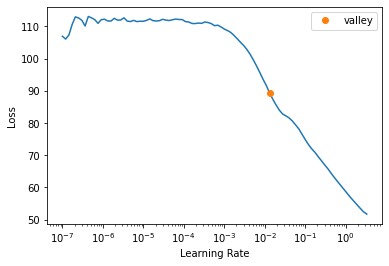

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    3.40       3.27
1    7.10       6.52
2    7.50       6.92
3    7.60       9.20
4    3.20       3.81
XGBoost RMSE:  1.7214034


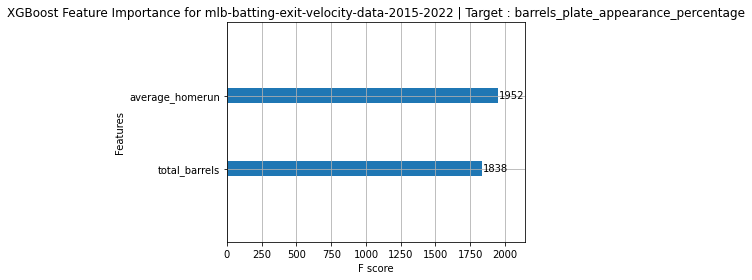

Target Variable: barrels_batted_balls_percentage
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5681448903778882, 'Adjusted R-Squared': 0.5659471544510581, 'RMSE': 2.853149954122328, 'Time taken': 0.05601620674133301}


 17%|█▋        | 7/42 [00:00<00:01, 32.90it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.5733493669582527, 'Adjusted R-Squared': 0.5711781169173278, 'RMSE': 2.835905556828395, 'Time taken': 0.05652308464050293}
{'Model': 'BayesianRidge', 'R-Squared': 0.6288877582007182, 'Adjusted R-Squared': 0.6269991462831646, 'RMSE': 2.644893605944523, 'Time taken': 0.012219429016113281}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.4243314839685949, 'Adjusted R-Squared': 0.42140187319998723, 'RMSE': 3.2941381251598076, 'Time taken': 0.012441158294677734}
{'Model': 'DummyRegressor', 'R-Squared': -0.0025522689856900538, 'Adjusted R-Squared': -0.007654316156100682, 'RMSE': 4.3471947, 'Time taken': 0.009426355361938477}
{'Model': 'ElasticNet', 'R-Squared': 0.5228203187470886, 'Adjusted R-Squared': 0.5203919234226463, 'RMSE': 2.9991386096341297, 'Time taken': 0.010118961334228516}
{'Model': 'ElasticNetCV', 'R-Squared': 0.628836562172937, 'Adjusted R-Squared': 0.626947689715802, 'RMSE': 2.6450760350880747, 'Time taken': 0.06885385513305664}
{'M

 26%|██▌       | 11/42 [00:00<00:02, 10.43it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -7402.554996401556, 'Adjusted R-Squared': -7440.232121065177, 'RMSE': 373.5732062648682, 'Time taken': 0.4207115173339844}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.505103931925828, 'Adjusted R-Squared': 0.5025853768720154, 'RMSE': 3.0543061603082804, 'Time taken': 0.02136969566345215}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6361062597910517, 'Adjusted R-Squared': 0.6342543832505483, 'RMSE': 2.619044387033342, 'Time taken': 0.14844250679016113}


 33%|███▎      | 14/42 [00:01<00:03,  7.47it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6391352373737473, 'Adjusted R-Squared': 0.6372987754774305, 'RMSE': 2.6081214126195085, 'Time taken': 0.4545557498931885}
{'Model': 'HuberRegressor', 'R-Squared': 0.6183115940865207, 'Adjusted R-Squared': 0.6163691594508287, 'RMSE': 2.682316681256375, 'Time taken': 0.018913984298706055}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.61202515147654, 'Adjusted R-Squared': 0.610050724766497, 'RMSE': 2.7043154, 'Time taken': 0.013160467147827148}


 48%|████▊     | 20/42 [00:02<00:02,  9.75it/s]

{'Model': 'KernelRidge', 'R-Squared': -2.402765118705455, 'Adjusted R-Squared': -2.4200819895385615, 'RMSE': 8.008875685348444, 'Time taken': 0.33879685401916504}
{'Model': 'Lars', 'R-Squared': 0.6289107893010509, 'Adjusted R-Squared': 0.6270222945901148, 'RMSE': 2.6448115340694085, 'Time taken': 0.03889751434326172}
{'Model': 'LarsCV', 'R-Squared': 0.6289107893010509, 'Adjusted R-Squared': 0.6270222945901148, 'RMSE': 2.6448115340694085, 'Time taken': 0.04974627494812012}
{'Model': 'Lasso', 'R-Squared': 0.5486314218308652, 'Adjusted R-Squared': 0.5463343807205898, 'RMSE': 2.9168978993178394, 'Time taken': 0.02641916275024414}


 52%|█████▏    | 22/42 [00:02<00:01, 11.03it/s]

{'Model': 'LassoCV', 'R-Squared': 0.6289272563317349, 'Adjusted R-Squared': 0.6270388454224816, 'RMSE': 2.6447528518515004, 'Time taken': 0.08539724349975586}
{'Model': 'LassoLars', 'R-Squared': -0.0025522595969371675, 'Adjusted R-Squared': -0.007654306719567794, 'RMSE': 4.34719454890297, 'Time taken': 0.01219034194946289}
{'Model': 'LassoLarsCV', 'R-Squared': 0.6289107893010509, 'Adjusted R-Squared': 0.6270222945901148, 'RMSE': 2.6448115340694085, 'Time taken': 0.021072864532470703}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6289107893010509, 'Adjusted R-Squared': 0.6270222945901148, 'RMSE': 2.6448115340694085, 'Time taken': 0.013323307037353516}
{'Model': 'LinearRegression', 'R-Squared': 0.6289107893010509, 'Adjusted R-Squared': 0.6270222945901148, 'RMSE': 2.6448115340694085, 'Time taken': 0.011957168579101562}
{'Model': 'LinearSVR', 'R-Squared': 0.6094459732786786, 'Adjusted R-Squared': 0.6074584209798424, 'RMSE': 2.7132894511020504, 'Time taken': 0.013934135437011719}


 64%|██████▍   | 27/42 [00:05<00:05,  2.56it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.6443006412666161, 'Adjusted R-Squared': 0.6424904664130111, 'RMSE': 2.589387859956405, 'Time taken': 3.6983349323272705}


 69%|██████▉   | 29/42 [00:06<00:04,  2.98it/s]

{'Model': 'NuSVR', 'R-Squared': 0.6319688954306342, 'Adjusted R-Squared': 0.6300959636007646, 'RMSE': 2.6338911859891954, 'Time taken': 0.2278766632080078}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5986024079155083, 'Adjusted R-Squared': 0.5965596720779283, 'RMSE': 2.7506982292159265, 'Time taken': 0.011662960052490234}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6289107893010509, 'Adjusted R-Squared': 0.6270222945901148, 'RMSE': 2.6448115340694085, 'Time taken': 0.017081022262573242}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.48063073287867786, 'Adjusted R-Squared': 0.47798763228264063, 'RMSE': 3.128914458312091, 'Time taken': 0.010531187057495117}
{'Model': 'PoissonRegressor', 'R-Squared': 0.5950505860497208, 'Adjusted R-Squared': 0.5929897747827984, 'RMSE': 2.7628413917927226, 'Time taken': 0.012686014175415039}
{'Model': 'RANSACRegressor', 'R-Squared': 0.5869359276109444, 'Adjusted R-Squared': 0.5848338203723232, 'RMSE': 2.790385957119212, 'Time 

 81%|████████  | 34/42 [00:06<00:01,  4.43it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5892486975414011, 'Adjusted R-Squared': 0.587158360124309, 'RMSE': 2.7825632245744907, 'Time taken': 0.3179645538330078}
{'Model': 'Ridge', 'R-Squared': 0.6288940202221215, 'Adjusted R-Squared': 0.6270054401723613, 'RMSE': 2.6448712913340473, 'Time taken': 0.013736486434936523}
{'Model': 'RidgeCV', 'R-Squared': 0.6288940202221257, 'Adjusted R-Squared': 0.6270054401723655, 'RMSE': 2.644871291334032, 'Time taken': 0.011423587799072266}
{'Model': 'SGDRegressor', 'R-Squared': 0.6286629749930803, 'Adjusted R-Squared': 0.6267732191406279, 'RMSE': 2.645694492579812, 'Time taken': 0.014508962631225586}


 98%|█████████▊| 41/42 [00:06<00:00,  7.28it/s]

{'Model': 'SVR', 'R-Squared': 0.6274762223058236, 'Adjusted R-Squared': 0.6255804269994919, 'RMSE': 2.649918795888285, 'Time taken': 0.1735706329345703}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6289107893010509, 'Adjusted R-Squared': 0.6270222945901148, 'RMSE': 2.6448115340694085, 'Time taken': 0.015735149383544922}
{'Model': 'TweedieRegressor', 'R-Squared': 0.505103931925828, 'Adjusted R-Squared': 0.5025853768720154, 'RMSE': 3.0543061603082804, 'Time taken': 0.012663841247558594}
{'Model': 'XGBRegressor', 'R-Squared': 0.5755730287554472, 'Adjusted R-Squared': 0.5734130950595462, 'RMSE': 2.8285058, 'Time taken': 0.10259437561035156}


100%|██████████| 42/42 [00:07<00:00,  5.99it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.6366313801981229, 'Adjusted R-Squared': 0.6347821760261032, 'RMSE': 2.617153986037258, 'Time taken': 0.13454484939575195}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: barrels_batted_balls_percentage
barrels_batted_balls_percentage
Target Standard Deviation: 4.102802753448486
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
MLPRegressor                                 0.64       0.64   2.59   
HistGradientBoostingRegressor                0.64       0.64   2.61   
LGBMRegressor                                0.63       0.64   2.62   
GradientBoostingRegressor                    0.63       0.64   2.62   
NuSVR                                        0.63       0.63   2.63   
LassoCV                                      0.63       0.63   2.64   
LassoLarsCV                                  0.63       0.63

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,40.630432,38.840240,6.232194,00:01
1,28.090755,31.321484,5.596560,00:01
2,22.793259,23.359417,4.833158,00:01
3,19.937590,22.044600,4.695168,00:01
4,18.243038,22.553770,4.749081,00:01


Better model found at epoch 0 with _rmse value: 6.232193946838379.
Better model found at epoch 1 with _rmse value: 5.596560001373291.
Better model found at epoch 2 with _rmse value: 4.833158016204834.
Better model found at epoch 3 with _rmse value: 4.695167541503906.
No improvement since epoch 3: early stopping


,average_homerun,total_barrels,barrels_batted_balls_percentage,barrels_batted_balls_percentage_pred
0,46.00,23.00,5.00,5.68
1,37.00,30.00,9.20,5.86
2,31.00,29.00,6.30,4.87
3,34.00,29.00,6.10,5.85
4,38.00,11.00,3.90,5.96
5,22.00,19.00,6.30,5.30
6,42.00,54.00,11.70,5.68
7,36.00,41.00,8.40,5.88
8,59.00,28.00,9.70,5.64


<Figure size 432x288 with 0 Axes>

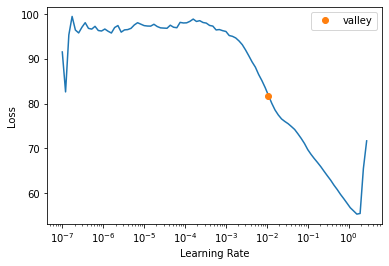

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    7.10       7.26
1   16.00       9.55
2    4.80       6.52
3    4.40       3.05
4   11.70      10.72
XGBoost RMSE:  2.832683


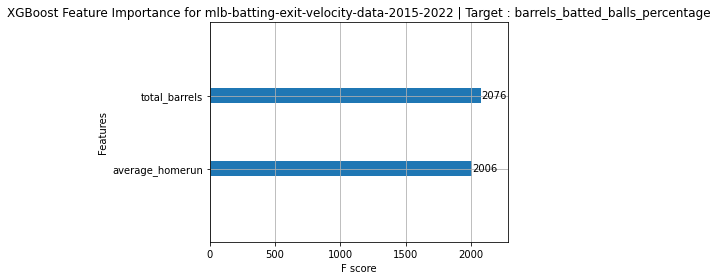

Target Variable: total_barrels
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
18
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barr

 10%|▉         | 4/42 [00:00<00:00, 39.51it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.12528772813948874, 'Adjusted R-Squared': 0.12306764623121325, 'RMSE': 13.519335948431882, 'Time taken': 0.04274439811706543}
{'Model': 'BaggingRegressor', 'R-Squared': 0.1415684648425385, 'Adjusted R-Squared': 0.13938970460102207, 'RMSE': 13.392929480571253, 'Time taken': 0.03417825698852539}
{'Model': 'BayesianRidge', 'R-Squared': 0.16209103204395547, 'Adjusted R-Squared': 0.15996435953645272, 'RMSE': 13.231868303289085, 'Time taken': 0.012033700942993164}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.13544688267646132, 'Adjusted R-Squared': 0.13325258542437102, 'RMSE': 13.440597972933153, 'Time taken': 0.011853694915771484}


 19%|█▉        | 8/42 [00:00<00:00, 37.52it/s]

{'Model': 'DummyRegressor', 'R-Squared': -3.1273157610200997e-06, 'Adjusted R-Squared': -0.0025412063191005974, 'RMSE': 14.455177519851679, 'Time taken': 0.013635396957397461}
{'Model': 'ElasticNet', 'R-Squared': 0.13993766200420132, 'Adjusted R-Squared': 0.13775476266918651, 'RMSE': 13.405645033970558, 'Time taken': 0.014687776565551758}
{'Model': 'ElasticNetCV', 'R-Squared': 0.16212113161590003, 'Adjusted R-Squared': 0.15999453550324994, 'RMSE': 13.231630641941628, 'Time taken': 0.0677790641784668}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.13544688267646132, 'Adjusted R-Squared': 0.13325258542437102, 'RMSE': 13.440597972933153, 'Time taken': 0.01242685317993164}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.13544688267646088, 'Adjusted R-Squared': 0.13325258542437057, 'RMSE': 13.440597972933157, 'Time taken': 0.1428689956665039}
{'Model': 'GammaRegressor', 'R-Squared': 0.12911238807511127, 'Adjusted R-Squared': 0.12690201342555563, 'RMSE': 13.489747071089806, 'Time taken': 0.0

 29%|██▊       | 12/42 [00:00<00:02, 12.83it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.16808330277176586, 'Adjusted R-Squared': 0.165971839073217, 'RMSE': 13.184469834490658, 'Time taken': 0.37452006340026855}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.12373831346961317, 'Adjusted R-Squared': 0.12151429903679489, 'RMSE': 13.531304335194232, 'Time taken': 0.02188277244567871}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.14908007678021595, 'Adjusted R-Squared': 0.14692038154361742, 'RMSE': 13.33420404306789, 'Time taken': 0.12184643745422363}


 36%|███▌      | 15/42 [00:01<00:03,  8.07it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.16556414157199761, 'Adjusted R-Squared': 0.1634462840632971, 'RMSE': 13.204416963171097, 'Time taken': 0.5134432315826416}
{'Model': 'HuberRegressor', 'R-Squared': 0.15583337872007808, 'Adjusted R-Squared': 0.153690823843733, 'RMSE': 13.281185371309125, 'Time taken': 0.01546931266784668}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.054875662325370334, 'Adjusted R-Squared': 0.05247686959015552, 'RMSE': 14.052941027242358, 'Time taken': 0.012393712997436523}


 45%|████▌     | 19/42 [00:01<00:02,  9.31it/s]

{'Model': 'KernelRidge', 'R-Squared': -2.783124661959725, 'Adjusted R-Squared': -2.792726501203278, 'RMSE': 28.115646652695936, 'Time taken': 0.24779319763183594}
{'Model': 'Lars', 'R-Squared': 0.16206676050504076, 'Adjusted R-Squared': 0.15994002639464744, 'RMSE': 13.232059944322314, 'Time taken': 0.03225088119506836}
{'Model': 'LarsCV', 'R-Squared': 0.16206676050504076, 'Adjusted R-Squared': 0.15994002639464744, 'RMSE': 13.232059944322314, 'Time taken': 0.06273174285888672}
{'Model': 'Lasso', 'R-Squared': 0.1591231086135645, 'Adjusted R-Squared': 0.156988903305477, 'RMSE': 13.255281621269054, 'Time taken': 0.013331174850463867}


 50%|█████     | 21/42 [00:01<00:01, 10.75it/s]

{'Model': 'LassoCV', 'R-Squared': 0.16207534577873228, 'Adjusted R-Squared': 0.15994863345837373, 'RMSE': 13.231992157807975, 'Time taken': 0.08606481552124023}
{'Model': 'LassoLars', 'R-Squared': -3.1273157610200997e-06, 'Adjusted R-Squared': -0.0025412063191005974, 'RMSE': 14.455177519851679, 'Time taken': 0.011609077453613281}
{'Model': 'LassoLarsCV', 'R-Squared': 0.16206676050504076, 'Adjusted R-Squared': 0.15994002639464744, 'RMSE': 13.232059944322314, 'Time taken': 0.0171051025390625}
{'Model': 'LassoLarsIC', 'R-Squared': 0.16206676050504076, 'Adjusted R-Squared': 0.15994002639464744, 'RMSE': 13.232059944322314, 'Time taken': 0.01184391975402832}
{'Model': 'LinearRegression', 'R-Squared': 0.16206676050504076, 'Adjusted R-Squared': 0.15994002639464744, 'RMSE': 13.232059944322314, 'Time taken': 0.011048316955566406}
{'Model': 'LinearSVR', 'R-Squared': 0.1460500649725751, 'Adjusted R-Squared': 0.143882679350678, 'RMSE': 13.357923603072518, 'Time taken': 0.012371063232421875}


 64%|██████▍   | 27/42 [00:05<00:05,  2.60it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.17483867856467783, 'Adjusted R-Squared': 0.17274436048996888, 'RMSE': 13.130830091307569, 'Time taken': 3.776015520095825}


 69%|██████▉   | 29/42 [00:05<00:04,  3.04it/s]

{'Model': 'NuSVR', 'R-Squared': 0.17587874619036648, 'Adjusted R-Squared': 0.1737870678812049, 'RMSE': 13.122552160021273, 'Time taken': 0.20867514610290527}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.16206676050504076, 'Adjusted R-Squared': 0.15994002639464744, 'RMSE': 13.232059944322314, 'Time taken': 0.010910511016845703}
OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(1587, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0558358482674447, 'Adjusted R-Squared': 0.053439492552387446, 'RMSE': 14.045800768156628, 'Time taken': 0.012785673141479492}
{'Model': 'PoissonRegressor', 'R-Squared': 0.15425632305562897, 'Adjusted R-Squared': 0.1521097654999326, 'RMSE': 13.293585408742755, 'Time taken': 0.012174844741821289}
{'Model': 'RANSACRegressor', 'R-Squared': 0.1353558945969311, 'Adjusted R-Squared': 0.1331613664106288, 'RMSE': 13.441305218097273, 'Time taken': 

 90%|█████████ | 38/42 [00:06<00:00,  6.30it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.15324265715886787, 'Adjusted R-Squared': 0.15109352684708832, 'RMSE': 13.301549535031198, 'Time taken': 0.18881964683532715}
{'Model': 'Ridge', 'R-Squared': 0.16207220668050626, 'Adjusted R-Squared': 0.1599454863928933, 'RMSE': 13.232016943141597, 'Time taken': 0.012728691101074219}
{'Model': 'RidgeCV', 'R-Squared': 0.16207220668050226, 'Adjusted R-Squared': 0.1599454863928893, 'RMSE': 13.232016943141627, 'Time taken': 0.010564088821411133}
{'Model': 'SGDRegressor', 'R-Squared': 0.16212685771076996, 'Adjusted R-Squared': 0.1600002761313556, 'RMSE': 13.231585429140205, 'Time taken': 0.011653900146484375}
{'Model': 'SVR', 'R-Squared': 0.17054214651560395, 'Adjusted R-Squared': 0.16843692353721706, 'RMSE': 13.164971162863289, 'Time taken': 0.15629792213439941}


100%|██████████| 42/42 [00:06<00:00,  6.34it/s]

{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.16206676050504076, 'Adjusted R-Squared': 0.15994002639464744, 'RMSE': 13.232059944322314, 'Time taken': 0.01621079444885254}
{'Model': 'TweedieRegressor', 'R-Squared': 0.12373831346961317, 'Adjusted R-Squared': 0.12151429903679489, 'RMSE': 13.531304335194232, 'Time taken': 0.011498451232910156}
{'Model': 'XGBRegressor', 'R-Squared': 0.1354789234535103, 'Adjusted R-Squared': 0.13328470752318922, 'RMSE': 13.44035, 'Time taken': 0.07198715209960938}
{'Model': 'LGBMRegressor', 'R-Squared': 0.1655563081056105, 'Adjusted R-Squared': 0.16343843071501551, 'RMSE': 13.20447894283834, 'Time taken': 0.11274433135986328}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: total_barrels
total_barrels
Target Standard Deviation: 14.932433498917232
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                        

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,504.667694,454.936310,21.329237,00:01
1,356.652893,375.361786,19.374256,00:01
2,282.010101,236.153030,15.367272,00:01
3,234.356674,207.108032,14.391249,00:01
4,206.467819,237.743866,15.418945,00:01


Better model found at epoch 0 with _rmse value: 21.32923698425293.
Better model found at epoch 1 with _rmse value: 19.374256134033203.
Better model found at epoch 2 with _rmse value: 15.36727237701416.
Better model found at epoch 3 with _rmse value: 14.39124870300293.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      28      34.77
1      10      20.56
2      47      28.38
3      10      17.73
4      28      19.44
XGBoost RMSE:  13.44035


<Figure size 432x288 with 0 Axes>

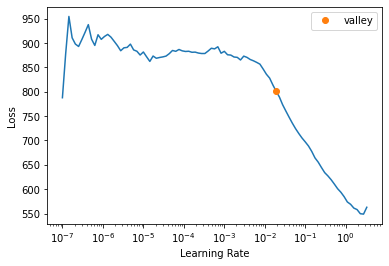

<Figure size 720x720 with 0 Axes>

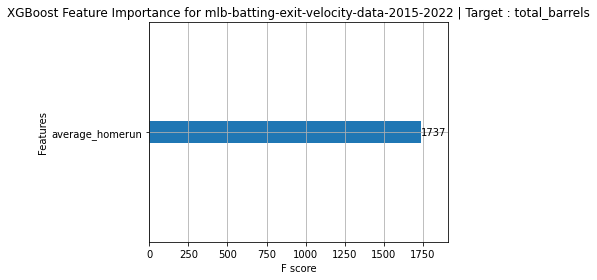

Target Variable: hard_hit_swing_percentage
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.12989522099745388, 'Adjusted R-Squared': 0.1254672068549474, 'RMSE': 2.784710897372266, 'Time taken': 0.03770709037780762}
{'Model': 'BaggingRegressor', 'R-Squared': -0.11456386438826782, 'Adjusted R-Squared': -0.12023594512306812, 'RMSE': 3.151714114307896, 'Time taken': 0.051775217056274414}
{'Model': 'BayesianRidge', 'R-Squared': 0.16957933160181748, 'Adjusted R-Squared': 0.16535327222065632, 'RMSE': 2.72046668735268, 'Time taken': 0.012195825576782227}


 17%|█▋        | 7/42 [00:00<00:01, 29.35it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.3789900184953201, 'Adjusted R-Squared': -0.38600777940369313, 'RMSE': 3.505701211084834, 'Time taken': 0.017878055572509766}
{'Model': 'DummyRegressor', 'R-Squared': -0.0020039593649550103, 'Adjusted R-Squared': -0.007103216155616376, 'RMSE': 2.9883335, 'Time taken': 0.012189626693725586}
{'Model': 'ElasticNet', 'R-Squared': 0.11641785429611629, 'Adjusted R-Squared': 0.11192125304571487, 'RMSE': 2.806194720041716, 'Time taken': 0.011580705642700195}
{'Model': 'ElasticNetCV', 'R-Squared': 0.16950371139351916, 'Adjusted R-Squared': 0.16527726717669233, 'RMSE': 2.7205905508246593, 'Time taken': 0.09287738800048828}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.5503401607498977, 'Adjusted R-Squared': -0.5582299325603297, 'RMSE': 3.717130735895404, 'Time taken': 0.022134780883789062}


 24%|██▍       | 10/42 [00:00<00:01, 16.84it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.2834571498039542, 'Adjusted R-Squared': -0.28998873835257477, 'RMSE': 3.382088939700507, 'Time taken': 0.24585723876953125}
{'Model': 'GammaRegressor', 'R-Squared': 0.146458564018909, 'Adjusted R-Squared': 0.1421148416983946, 'RMSE': 2.7580786213259185, 'Time taken': 0.014794588088989258}


 31%|███       | 13/42 [00:01<00:03,  8.79it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -7.930911924249374, 'Adjusted R-Squared': -7.976361857706113, 'RMSE': 8.921589580827447, 'Time taken': 0.43279504776000977}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.14693646474926392, 'Adjusted R-Squared': 0.14259517449353498, 'RMSE': 2.7573063844525487, 'Time taken': 0.044055938720703125}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.13993283651648736, 'Adjusted R-Squared': 0.13555590438680032, 'RMSE': 2.7686019526715198, 'Time taken': 0.13917255401611328}


 36%|███▌      | 15/42 [00:01<00:04,  6.55it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.11802404277578915, 'Adjusted R-Squared': 0.11353561551256164, 'RMSE': 2.803642989076143, 'Time taken': 0.5034725666046143}
{'Model': 'HuberRegressor', 'R-Squared': 0.1662249663565738, 'Adjusted R-Squared': 0.16198183641436814, 'RMSE': 2.725955617598027, 'Time taken': 0.01993560791015625}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.06478637361905282, 'Adjusted R-Squared': 0.06002701674179611, 'RMSE': 2.8870196, 'Time taken': 0.014029979705810547}


 45%|████▌     | 19/42 [00:02<00:03,  7.66it/s]

{'Model': 'KernelRidge', 'R-Squared': -22.633891924432945, 'Adjusted R-Squared': -22.754166183590364, 'RMSE': 14.513159224313501, 'Time taken': 0.330594539642334}
{'Model': 'Lars', 'R-Squared': 0.1693902378322264, 'Adjusted R-Squared': 0.16516321614180518, 'RMSE': 2.720776406293477, 'Time taken': 0.03941512107849121}
{'Model': 'LarsCV', 'R-Squared': 0.1693902378322264, 'Adjusted R-Squared': 0.16516321614180518, 'RMSE': 2.720776406293477, 'Time taken': 0.07391357421875}
{'Model': 'Lasso', 'R-Squared': 0.07061603048281995, 'Adjusted R-Squared': 0.06588634107051883, 'RMSE': 2.8780075306136794, 'Time taken': 0.012473821640014648}


 52%|█████▏    | 22/42 [00:02<00:01, 10.58it/s]

{'Model': 'LassoCV', 'R-Squared': 0.1694194953750584, 'Adjusted R-Squared': 0.16519262257798495, 'RMSE': 2.7207284873206508, 'Time taken': 0.07751274108886719}
{'Model': 'LassoLars', 'R-Squared': -0.002003992030749302, 'Adjusted R-Squared': -0.0071032489876488025, 'RMSE': 2.9883334988512917, 'Time taken': 0.011287212371826172}
{'Model': 'LassoLarsCV', 'R-Squared': 0.1693902378322264, 'Adjusted R-Squared': 0.16516321614180518, 'RMSE': 2.720776406293477, 'Time taken': 0.02108144760131836}
{'Model': 'LassoLarsIC', 'R-Squared': 0.1693902378322264, 'Adjusted R-Squared': 0.16516321614180518, 'RMSE': 2.720776406293477, 'Time taken': 0.01248025894165039}
{'Model': 'LinearRegression', 'R-Squared': 0.1693902378322264, 'Adjusted R-Squared': 0.16516321614180518, 'RMSE': 2.720776406293477, 'Time taken': 0.011168241500854492}
{'Model': 'LinearSVR', 'R-Squared': 0.16164320374709706, 'Adjusted R-Squared': 0.15737675694682784, 'RMSE': 2.7334351952246942, 'Time taken': 0.013235092163085938}


 64%|██████▍   | 27/42 [00:05<00:05,  2.73it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.1783430275382889, 'Adjusted R-Squared': 0.1741615671186365, 'RMSE': 2.706073633799263, 'Time taken': 3.2965428829193115}


 69%|██████▉   | 29/42 [00:05<00:04,  3.18it/s]

{'Model': 'NuSVR', 'R-Squared': 0.17494507955246152, 'Adjusted R-Squared': 0.17074632677664714, 'RMSE': 2.71166332075301, 'Time taken': 0.23358654975891113}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.15327198109303575, 'Adjusted R-Squared': 0.14896293265076122, 'RMSE': 2.7470483471081595, 'Time taken': 0.011716127395629883}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.1693902378322264, 'Adjusted R-Squared': 0.16516321614180518, 'RMSE': 2.720776406293477, 'Time taken': 0.022525310516357422}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.2293387213465483, 'Adjusted R-Squared': -0.23559489804551292, 'RMSE': 3.310016189165998, 'Time taken': 0.013168573379516602}
{'Model': 'PoissonRegressor', 'R-Squared': 0.16809833772395877, 'Adjusted R-Squared': 0.16386474147827923, 'RMSE': 2.7228914823443757, 'Time taken': 0.013448238372802734}
{'Model': 'RANSACRegressor', 'R-Squared': -0.026185527769621686, 'Adjusted R-Squared': -0.03140784597710056, 'RMSE': 3.024177515355

 81%|████████  | 34/42 [00:06<00:01,  4.63it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.09319617685710302, 'Adjusted R-Squared': -0.09875951617953094, 'RMSE': 3.1213566135379334, 'Time taken': 0.3431243896484375}
{'Model': 'Ridge', 'R-Squared': 0.16941238291030603, 'Adjusted R-Squared': 0.16518547391748317, 'RMSE': 2.7207401364286734, 'Time taken': 0.011128425598144531}
{'Model': 'RidgeCV', 'R-Squared': 0.16960504829755751, 'Adjusted R-Squared': 0.16537911979016595, 'RMSE': 2.7204245629461075, 'Time taken': 0.010523796081542969}
{'Model': 'SGDRegressor', 'R-Squared': 0.16869685660076517, 'Adjusted R-Squared': 0.16446630625267755, 'RMSE': 2.721911802138834, 'Time taken': 0.011270999908447266}
{'Model': 'SVR', 'R-Squared': 0.16754716665928393, 'Adjusted R-Squared': 0.16331076547179946, 'RMSE': 2.723793350055923, 'Time taken': 0.16666555404663086}


 98%|█████████▊| 41/42 [00:06<00:00,  7.67it/s]

{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.1693902378322264, 'Adjusted R-Squared': 0.16516321614180518, 'RMSE': 2.720776406293477, 'Time taken': 0.014765739440917969}
{'Model': 'TweedieRegressor', 'R-Squared': 0.14693646474926392, 'Adjusted R-Squared': 0.14259517449353498, 'RMSE': 2.7573063844525487, 'Time taken': 0.011839628219604492}
{'Model': 'XGBRegressor', 'R-Squared': -0.04923729718580416, 'Adjusted R-Squared': -0.05457692719692786, 'RMSE': 3.0579557, 'Time taken': 0.10057306289672852}


100%|██████████| 42/42 [00:06<00:00,  6.24it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.10550906691465067, 'Adjusted R-Squared': 0.10095695020683726, 'RMSE': 2.823464350991937, 'Time taken': 0.12943148612976074}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: hard_hit_swing_percentage
hard_hit_swing_percentage
Target Standard Deviation: 2.9138567447662354
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
MLPRegressor                                 0.17       0.18  2.71        3.30
NuSVR                                        0.17       0.17  2.71        0.23
RidgeCV                                      0.17       0.17  2.72        0.01
BayesianRidge                                0.17       0.17  2.72        0.01
ElasticNetCV                                 0.17       0.17  2.72        0.09
LassoCV                                      0.17       0.17  2.72        0.08
Ridge

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,81.657257,62.962299,7.934879,00:01
1,45.653664,54.312950,7.369732,00:01
2,29.507914,24.853176,4.985296,00:01
3,20.756836,13.004069,3.606116,00:01
4,16.315207,11.087481,3.329787,00:01
5,13.939160,10.392898,3.223802,00:01
6,11.946045,9.070090,3.011659,00:01
7,10.702440,8.880075,2.979945,00:01
8,9.984315,9.518280,3.085171,00:01


Better model found at epoch 0 with _rmse value: 7.934878826141357.
Better model found at epoch 1 with _rmse value: 7.369731903076172.
Better model found at epoch 2 with _rmse value: 4.98529577255249.
Better model found at epoch 3 with _rmse value: 3.6061155796051025.
Better model found at epoch 4 with _rmse value: 3.329787015914917.
Better model found at epoch 5 with _rmse value: 3.223801612854004.
Better model found at epoch 6 with _rmse value: 3.0116591453552246.
Better model found at epoch 7 with _rmse value: 2.979945421218872.
No improvement since epoch 7: early stopping


,average_homerun,total_barrels,hard_hit_swing_percentage,hard_hit_swing_percentage_pred
0,54.00,22.00,11.70,14.03
1,54.00,17.00,11.00,13.21
2,26.00,13.00,12.60,13.86
3,29.00,18.00,10.10,14.73
4,53.00,38.00,15.80,13.99
5,31.00,12.00,12.00,13.50
6,51.00,57.00,18.80,14.33
7,26.00,12.00,13.70,13.50
8,38.00,19.00,14.70,13.85


<Figure size 432x288 with 0 Axes>

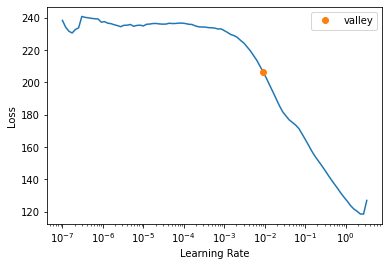

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   17.60      13.25
1   11.20      14.69
2   12.10      11.80
3   13.20      17.92
4   16.10      17.80
XGBoost RMSE:  3.0547876


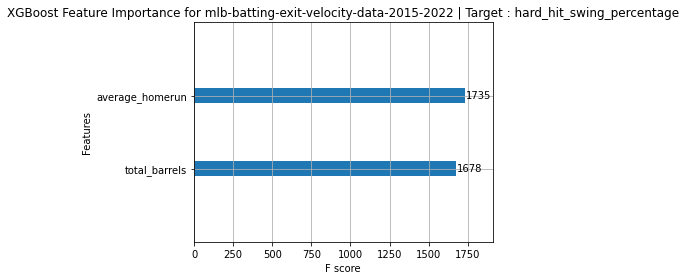

Target Variable: hard_hit_percentage
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983


  5%|▍         | 2/42 [00:00<00:02, 18.44it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.3369366723526339, 'Adjusted R-Squared': 0.3335623042730036, 'RMSE': 6.179671075306436, 'Time taken': 0.06267333030700684}
{'Model': 'BaggingRegressor', 'R-Squared': 0.18384275785149207, 'Adjusted R-Squared': 0.17968928588127075, 'RMSE': 6.856062602654924, 'Time taken': 0.04555821418762207}


 17%|█▋        | 7/42 [00:00<00:01, 31.69it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.3860585288775139, 'Adjusted R-Squared': 0.38293414480055477, 'RMSE': 5.946361944316412, 'Time taken': 0.015125513076782227}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.017678006923885548, 'Adjusted R-Squared': -0.022857029859884914, 'RMSE': 7.655843546038223, 'Time taken': 0.01404881477355957}
{'Model': 'DummyRegressor', 'R-Squared': -0.0009844341003408807, 'Adjusted R-Squared': -0.006078502467263602, 'RMSE': 7.592792, 'Time taken': 0.010035991668701172}
{'Model': 'ElasticNet', 'R-Squared': 0.37914951131308927, 'Adjusted R-Squared': 0.3759899668414002, 'RMSE': 5.9797271615796985, 'Time taken': 0.010738134384155273}
{'Model': 'ElasticNetCV', 'R-Squared': 0.38669418853524207, 'Adjusted R-Squared': 0.38357303936748255, 'RMSE': 5.9432827898068314, 'Time taken': 0.0738058090209961}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.004753137012794895, 'Adjusted R-Squared': -0.009866384529399364, 'RMSE': 7.607072240309776, 'Time taken': 0.0157291

 26%|██▌       | 11/42 [00:00<00:02, 10.67it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -365.1885899954138, 'Adjusted R-Squared': -367.05214516078485, 'RMSE': 145.22462348126714, 'Time taken': 0.36779284477233887}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.3599782260294311, 'Adjusted R-Squared': 0.35672111776494986, 'RMSE': 6.071349441198317, 'Time taken': 0.04770946502685547}


 31%|███       | 13/42 [00:01<00:02, 10.32it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.3802226462095505, 'Adjusted R-Squared': 0.3770685629841538, 'RMSE': 5.974556972169735, 'Time taken': 0.16235613822937012}


 36%|███▌      | 15/42 [00:01<00:05,  5.38it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.32812661967971846, 'Adjusted R-Squared': 0.32470741672643466, 'RMSE': 6.2205899224240735, 'Time taken': 0.8241462707519531}
{'Model': 'HuberRegressor', 'R-Squared': 0.3872703025482006, 'Adjusted R-Squared': 0.38415208525836964, 'RMSE': 5.940490697424123, 'Time taken': 0.04008054733276367}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.2962731153893279, 'Adjusted R-Squared': 0.29269180808851025, 'RMSE': 6.3663416, 'Time taken': 0.021274805068969727}


 50%|█████     | 21/42 [00:02<00:02,  7.93it/s]

{'Model': 'KernelRidge', 'R-Squared': -24.133729852650323, 'Adjusted R-Squared': -24.261636874801212, 'RMSE': 38.0466415273531, 'Time taken': 0.3690674304962158}
{'Model': 'Lars', 'R-Squared': 0.38583650112948353, 'Adjusted R-Squared': 0.3827109871403206, 'RMSE': 5.947437077753088, 'Time taken': 0.0234832763671875}
{'Model': 'LarsCV', 'R-Squared': 0.38583650112948353, 'Adjusted R-Squared': 0.3827109871403206, 'RMSE': 5.947437077753088, 'Time taken': 0.035599708557128906}
{'Model': 'Lasso', 'R-Squared': 0.3934111532282143, 'Adjusted R-Squared': 0.3903241870868821, 'RMSE': 5.910647580389114, 'Time taken': 0.02206707000732422}
{'Model': 'LassoCV', 'R-Squared': 0.38600527742678614, 'Adjusted R-Squared': 0.3828806223500777, 'RMSE': 5.946619823567862, 'Time taken': 0.09597969055175781}
{'Model': 'LassoLars', 'R-Squared': -0.0009844311508742098, 'Adjusted R-Squared': -0.006078499502786938, 'RMSE': 7.59279223931806, 'Time taken': 0.0133056640625}
{'Model': 'LassoLarsCV', 'R-Squared': 0.3858365

 64%|██████▍   | 27/42 [00:06<00:05,  2.50it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.40778496168604983, 'Adjusted R-Squared': 0.4047711446971748, 'RMSE': 5.84019799451267, 'Time taken': 4.048284530639648}


 67%|██████▋   | 28/42 [00:06<00:05,  2.60it/s]

{'Model': 'NuSVR', 'R-Squared': 0.42205674591043396, 'Adjusted R-Squared': 0.41911555886672125, 'RMSE': 5.76939740125746, 'Time taken': 0.24963116645812988}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.3097009271612774, 'Adjusted R-Squared': 0.3061879547804188, 'RMSE': 6.305310823021143, 'Time taken': 0.011790275573730469}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.38583650112948353, 'Adjusted R-Squared': 0.3827109871403206, 'RMSE': 5.947437077753088, 'Time taken': 0.01580357551574707}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.3951371461633614, 'Adjusted R-Squared': 0.3920589637010884, 'RMSE': 5.902232487209231, 'Time taken': 0.015507221221923828}
{'Model': 'PoissonRegressor', 'R-Squared': 0.37119214165779413, 'Adjusted R-Squared': 0.36799210166623075, 'RMSE': 6.0179258933967175, 'Time taken': 0.012086153030395508}
{'Model': 'RANSACRegressor', 'R-Squared': 0.29605743577147814, 'Adjusted R-Squared': 0.2924750308644628, 'RMSE': 6.367316942519534, 'Time 

 81%|████████  | 34/42 [00:07<00:01,  4.22it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.19835094792287367, 'Adjusted R-Squared': 0.19427130898100542, 'RMSE': 6.79485192331084, 'Time taken': 0.3361213207244873}
{'Model': 'Ridge', 'R-Squared': 0.3859206743304615, 'Adjusted R-Squared': 0.3827955887036446, 'RMSE': 5.947029505525752, 'Time taken': 0.011869192123413086}
{'Model': 'RidgeCV', 'R-Squared': 0.3859206743304522, 'Adjusted R-Squared': 0.38279558870363517, 'RMSE': 5.947029505525797, 'Time taken': 0.01460886001586914}
{'Model': 'SGDRegressor', 'R-Squared': 0.38736241908558167, 'Adjusted R-Squared': 0.38424467058220046, 'RMSE': 5.940044139990967, 'Time taken': 0.03089141845703125}


 98%|█████████▊| 41/42 [00:07<00:00,  6.60it/s]

{'Model': 'SVR', 'R-Squared': 0.4193930584183002, 'Adjusted R-Squared': 0.4164383157130499, 'RMSE': 5.782677429181174, 'Time taken': 0.19552230834960938}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.38583650112948353, 'Adjusted R-Squared': 0.3827109871403206, 'RMSE': 5.947437077753088, 'Time taken': 0.01465606689453125}
{'Model': 'TweedieRegressor', 'R-Squared': 0.3599782260294311, 'Adjusted R-Squared': 0.35672111776494986, 'RMSE': 6.071349441198317, 'Time taken': 0.014922380447387695}
{'Model': 'XGBRegressor', 'R-Squared': 0.22710931886973562, 'Adjusted R-Squared': 0.22317603296067579, 'RMSE': 6.6718597, 'Time taken': 0.13380074501037598}


100%|██████████| 42/42 [00:07<00:00,  5.27it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.3245683692886946, 'Adjusted R-Squared': 0.32113105819092713, 'RMSE': 6.237040334418859, 'Time taken': 0.17746710777282715}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: hard_hit_percentage
hard_hit_percentage
Target Standard Deviation: 7.972198486328125
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
NuSVR                                        0.42       0.42   5.77   
SVR                                          0.42       0.42   5.78   
MLPRegressor                                 0.40       0.41   5.84   
PassiveAggressiveRegressor                   0.39       0.40   5.90   
Lasso                                        0.39       0.39   5.91   
SGDRegressor                                 0.38       0.39   5.94   
HuberRegressor                               0.38       0.39   5.94   
ElasticNetCV

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,645.042603,728.701233,26.994467,00:01
1,351.879730,407.728973,20.192301,00:01
2,218.455719,165.186005,12.852469,00:01
3,152.221695,137.891571,11.742724,00:01
4,115.108429,91.034454,9.541198,00:01
5,94.330421,88.358612,9.399927,00:01
6,81.180290,68.638779,8.284853,00:01
7,72.645172,68.973656,8.305037,00:01


Better model found at epoch 0 with _rmse value: 26.99446678161621.
Better model found at epoch 1 with _rmse value: 20.19230079650879.
Better model found at epoch 2 with _rmse value: 12.852469444274902.
Better model found at epoch 3 with _rmse value: 11.742724418640137.
Better model found at epoch 4 with _rmse value: 9.541197776794434.
Better model found at epoch 5 with _rmse value: 9.399927139282227.
Better model found at epoch 6 with _rmse value: 8.284852981567383.
No improvement since epoch 6: early stopping


,average_homerun,total_barrels,hard_hit_percentage,hard_hit_percentage_pred
0,54.00,59.00,45.60,35.82
1,53.00,32.00,48.40,36.51
2,55.00,60.00,40.30,29.78
3,44.00,48.00,37.20,34.53
4,57.00,8.00,48.90,35.43
5,35.00,32.00,31.10,36.20
6,41.00,20.00,39.90,33.26
7,45.00,52.00,47.50,35.58
8,34.00,33.00,47.00,33.72


<Figure size 432x288 with 0 Axes>

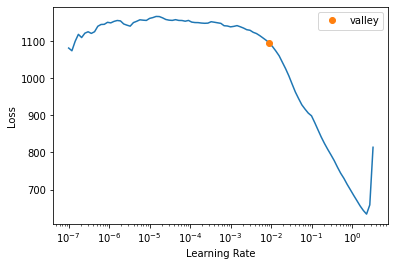

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   43.70      39.30
1   38.10      39.03
2   41.50      45.96
3   38.60      47.08
4   29.40      36.16
XGBoost RMSE:  6.6774178


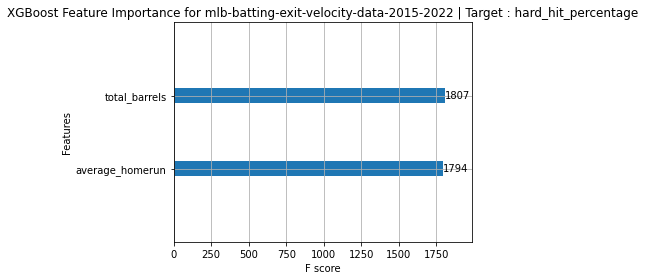

Target Variable: hard_hit_95mph+
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983


  5%|▍         | 2/42 [00:00<00:02, 19.36it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5092986846320045, 'Adjusted R-Squared': 0.506801476920208, 'RMSE': 33.545823237953094, 'Time taken': 0.054388999938964844}
{'Model': 'BaggingRegressor', 'R-Squared': 0.39264466101560935, 'Adjusted R-Squared': 0.3895537941505489, 'RMSE': 37.320827955517366, 'Time taken': 0.04862165451049805}


 17%|█▋        | 7/42 [00:00<00:01, 32.50it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.5392981281745491, 'Adjusted R-Squared': 0.5369535893866334, 'RMSE': 32.50422619463549, 'Time taken': 0.01533818244934082}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.2478678230221676, 'Adjusted R-Squared': 0.24404017835561376, 'RMSE': 41.53143407268232, 'Time taken': 0.013796329498291016}
{'Model': 'DummyRegressor', 'R-Squared': -0.004395915274071793, 'Adjusted R-Squared': -0.009507344868341816, 'RMSE': 47.99349, 'Time taken': 0.009332418441772461}
{'Model': 'ElasticNet', 'R-Squared': 0.45157505026048095, 'Adjusted R-Squared': 0.4487840835951399, 'RMSE': 35.464059360116366, 'Time taken': 0.01040792465209961}
{'Model': 'ElasticNetCV', 'R-Squared': 0.5364104396575069, 'Adjusted R-Squared': 0.5340512052537283, 'RMSE': 32.605935633298685, 'Time taken': 0.0738821029663086}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.26261458395930093, 'Adjusted R-Squared': 0.25886198642219815, 'RMSE': 41.12227330209246, 'Time taken': 0.013965845108032227}
{

 31%|███       | 13/42 [00:01<00:03,  8.44it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1400.0491662704442, 'Adjusted R-Squared': -1407.1791874728383, 'RMSE': 1792.4891319228554, 'Time taken': 0.6259586811065674}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.376005021648672, 'Adjusted R-Squared': 0.372829474685052, 'RMSE': 37.828610602930475, 'Time taken': 0.026788949966430664}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.5180127663472864, 'Adjusted R-Squared': 0.5155599051073235, 'RMSE': 33.24662851522732, 'Time taken': 0.15413236618041992}


 36%|███▌      | 15/42 [00:02<00:05,  5.00it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.501830300678423, 'Adjusted R-Squared': 0.49929508592360594, 'RMSE': 33.80013986525238, 'Time taken': 0.8299219608306885}
{'Model': 'HuberRegressor', 'R-Squared': 0.535011863031841, 'Adjusted R-Squared': 0.5326455111897639, 'RMSE': 32.655082078429665, 'Time taken': 0.019613981246948242}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.47329424245907015, 'Adjusted R-Squared': 0.47061380603392555, 'RMSE': 34.754726, 'Time taken': 0.014078617095947266}


 48%|████▊     | 20/42 [00:02<00:02,  7.68it/s]

{'Model': 'KernelRidge', 'R-Squared': -6.219446122254081, 'Adjusted R-Squared': -6.256186306082346, 'RMSE': 128.6713279149578, 'Time taken': 0.2857840061187744}
{'Model': 'Lars', 'R-Squared': 0.5393379776198668, 'Adjusted R-Squared': 0.5369936416281105, 'RMSE': 32.502820401134095, 'Time taken': 0.02341294288635254}
{'Model': 'LarsCV', 'R-Squared': 0.5393379776198668, 'Adjusted R-Squared': 0.5369936416281105, 'RMSE': 32.502820401134095, 'Time taken': 0.04975414276123047}
{'Model': 'Lasso', 'R-Squared': 0.5356908080137948, 'Adjusted R-Squared': 0.5333279113624655, 'RMSE': 32.63123297194477, 'Time taken': 0.026622533798217773}
{'Model': 'LassoCV', 'R-Squared': 0.5392675129114332, 'Adjusted R-Squared': 0.5369228183206517, 'RMSE': 32.50530618688899, 'Time taken': 0.09147429466247559}


 52%|█████▏    | 22/42 [00:02<00:02,  9.03it/s]

{'Model': 'LassoLars', 'R-Squared': -0.004395913367546633, 'Adjusted R-Squared': -0.009507342952114195, 'RMSE': 47.99348773153748, 'Time taken': 0.015792131423950195}
{'Model': 'LassoLarsCV', 'R-Squared': 0.5393379776198668, 'Adjusted R-Squared': 0.5369936416281105, 'RMSE': 32.502820401134095, 'Time taken': 0.019935131072998047}
{'Model': 'LassoLarsIC', 'R-Squared': 0.5393379776198668, 'Adjusted R-Squared': 0.5369936416281105, 'RMSE': 32.502820401134095, 'Time taken': 0.012065410614013672}
{'Model': 'LinearRegression', 'R-Squared': 0.5393379776198668, 'Adjusted R-Squared': 0.5369936416281105, 'RMSE': 32.502820401134095, 'Time taken': 0.011757850646972656}
{'Model': 'LinearSVR', 'R-Squared': 0.5192504461018532, 'Adjusted R-Squared': 0.5168038834865956, 'RMSE': 33.20391459438612, 'Time taken': 0.012495756149291992}


 64%|██████▍   | 27/42 [00:06<00:05,  2.67it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.49609324154260104, 'Adjusted R-Squared': 0.49352883055808505, 'RMSE': 33.99420857640066, 'Time taken': 3.234649896621704}


 69%|██████▉   | 29/42 [00:06<00:04,  3.14it/s]

{'Model': 'NuSVR', 'R-Squared': 0.4912671064274611, 'Adjusted R-Squared': 0.48867813495889856, 'RMSE': 34.15660934875036, 'Time taken': 0.2094419002532959}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5218479624027672, 'Adjusted R-Squared': 0.5194146186999824, 'RMSE': 33.114091811620504, 'Time taken': 0.012511253356933594}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5393379776198668, 'Adjusted R-Squared': 0.5369936416281105, 'RMSE': 32.502820401134095, 'Time taken': 0.018854141235351562}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5265515871121028, 'Adjusted R-Squared': 0.5241421804307396, 'RMSE': 32.95081612628633, 'Time taken': 0.012203216552734375}
{'Model': 'PoissonRegressor', 'R-Squared': 0.4949503124702125, 'Adjusted R-Squared': 0.4923800850527581, 'RMSE': 34.032738485572835, 'Time taken': 0.01229238510131836}
{'Model': 'RANSACRegressor', 'R-Squared': 0.5240953960714287, 'Adjusted R-Squared': 0.521673489690113, 'RMSE': 33.036177910527236, 'Time tak

 81%|████████  | 34/42 [00:06<00:01,  4.68it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.4301316996676632, 'Adjusted R-Squared': 0.42723160653620096, 'RMSE': 36.150731777697494, 'Time taken': 0.3197019100189209}
{'Model': 'Ridge', 'R-Squared': 0.5393068698157186, 'Adjusted R-Squared': 0.5369623755145263, 'RMSE': 32.50391781556527, 'Time taken': 0.013779401779174805}
{'Model': 'RidgeCV', 'R-Squared': 0.5393068698156958, 'Adjusted R-Squared': 0.5369623755145034, 'RMSE': 32.50391781556608, 'Time taken': 0.011638164520263672}
{'Model': 'SGDRegressor', 'R-Squared': 0.5391453573111279, 'Adjusted R-Squared': 0.5368000410633473, 'RMSE': 32.50961502351849, 'Time taken': 0.013100862503051758}


 98%|█████████▊| 41/42 [00:06<00:00,  7.74it/s]

{'Model': 'SVR', 'R-Squared': 0.4908857991926163, 'Adjusted R-Squared': 0.48829488722922, 'RMSE': 34.16940754094745, 'Time taken': 0.17003273963928223}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.5393379776198668, 'Adjusted R-Squared': 0.5369936416281105, 'RMSE': 32.502820401134095, 'Time taken': 0.014810323715209961}
{'Model': 'TweedieRegressor', 'R-Squared': 0.376005021648672, 'Adjusted R-Squared': 0.372829474685052, 'RMSE': 37.828610602930475, 'Time taken': 0.012009859085083008}
{'Model': 'XGBRegressor', 'R-Squared': 0.4132140184341132, 'Adjusted R-Squared': 0.4102278302327601, 'RMSE': 36.68341, 'Time taken': 0.09926223754882812}


100%|██████████| 42/42 [00:07<00:00,  5.92it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.5007831886912564, 'Adjusted R-Squared': 0.49824264512225513, 'RMSE': 33.8356437840345, 'Time taken': 0.12105035781860352}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: hard_hit_95mph+
hard_hit_95mph+
Target Standard Deviation: 48.40812301635742
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
LassoLarsIC                                  0.54       0.54   32.50   
Lars                                         0.54       0.54   32.50   
LarsCV                                       0.54       0.54   32.50   
LassoLarsCV                                  0.54       0.54   32.50   
OrthogonalMatchingPursuitCV                  0.54       0.54   32.50   
LinearRegression                             0.54       0.54   32.50   
TransformedTargetRegressor                   0.54       0.54   32.50   
Ridge       

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,15607.434570,14772.250977,121.541161,00:01
1,9847.431641,2672.363281,51.694904,00:01
2,6189.344727,3560.306396,59.668301,00:01


Better model found at epoch 0 with _rmse value: 121.5411605834961.
Better model found at epoch 1 with _rmse value: 51.69490432739258.
No improvement since epoch 1: early stopping


,average_homerun,total_barrels,hard_hit_95mph+,hard_hit_95mph+_pred
0,44.00,31.00,110.00,101.73
1,10.00,2.00,61.00,103.52
2,46.00,31.00,112.00,101.32
3,55.00,22.00,83.00,96.18
4,30.00,3.00,88.00,100.91
5,47.00,18.00,80.00,94.86
6,27.00,12.00,105.00,96.45
7,32.00,11.00,54.00,104.59
8,25.00,11.00,93.00,102.70


<Figure size 432x288 with 0 Axes>

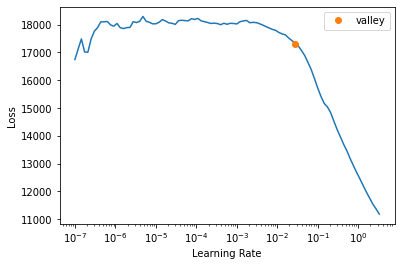

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  130.00     118.94
1  130.00     119.30
2   83.00     120.46
3  143.00     131.68
4  152.00     135.06
XGBoost RMSE:  36.725628


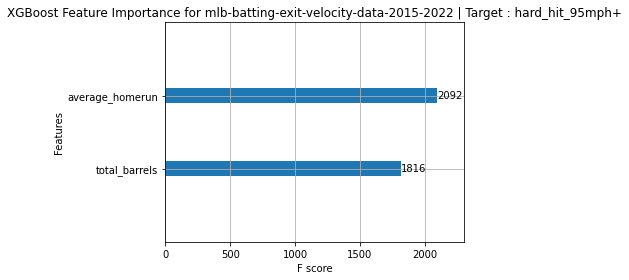

Target Variable: average_homerun
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
18
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_ba

 10%|▉         | 4/42 [00:00<00:00, 39.95it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.06378349476098288, 'Adjusted R-Squared': 0.06140731073753358, 'RMSE': 10.488829053093047, 'Time taken': 0.04289650917053223}
{'Model': 'BaggingRegressor', 'R-Squared': 0.025046886320939543, 'Adjusted R-Squared': 0.02257238603241396, 'RMSE': 10.703621074508968, 'Time taken': 0.034897804260253906}
{'Model': 'BayesianRidge', 'R-Squared': 0.13894891920704122, 'Adjusted R-Squared': 0.1367635103725413, 'RMSE': 10.058965503389826, 'Time taken': 0.010678291320800781}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.014385766317074333, 'Adjusted R-Squared': 0.01188420734833584, 'RMSE': 10.761984048937807, 'Time taken': 0.011275768280029297}


 19%|█▉        | 8/42 [00:00<00:00, 36.87it/s]

{'Model': 'DummyRegressor', 'R-Squared': -3.019813568783114e-05, 'Adjusted R-Squared': -0.002568345846692077, 'RMSE': 10.840402757509285, 'Time taken': 0.015799283981323242}
{'Model': 'ElasticNet', 'R-Squared': 0.12235810384578427, 'Adjusted R-Squared': 0.12013058634285478, 'RMSE': 10.15541169562865, 'Time taken': 0.012935161590576172}
{'Model': 'ElasticNetCV', 'R-Squared': 0.13901323186407033, 'Adjusted R-Squared': 0.1368279862596644, 'RMSE': 10.05858983991695, 'Time taken': 0.07161331176757812}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.014385766317074333, 'Adjusted R-Squared': 0.01188420734833584, 'RMSE': 10.761984048937807, 'Time taken': 0.012194395065307617}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.014489889445495452, 'Adjusted R-Squared': 0.011988594748656545, 'RMSE': 10.761415570416718, 'Time taken': 0.14155268669128418}
{'Model': 'GammaRegressor', 'R-Squared': 0.10971015956753793, 'Adjusted R-Squared': 0.10745054068319149, 'RMSE': 10.228326185034813, 'Time taken': 0.

 29%|██▊       | 12/42 [00:00<00:02, 11.72it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.18788299174504863, 'Adjusted R-Squared': -0.19089792319617827, 'RMSE': 11.814781456902375, 'Time taken': 0.4376819133758545}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.11079623335007316, 'Adjusted R-Squared': 0.10853937099816968, 'RMSE': 10.222085460732547, 'Time taken': 0.022782325744628906}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.03439340767930921, 'Adjusted R-Squared': 0.031942629526210964, 'RMSE': 10.652191655258607, 'Time taken': 0.11866474151611328}


 36%|███▌      | 15/42 [00:01<00:03,  7.88it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.12375844248290868, 'Adjusted R-Squared': 0.12153447913895665, 'RMSE': 10.147306628732752, 'Time taken': 0.4909050464630127}
{'Model': 'HuberRegressor', 'R-Squared': 0.13963898804306263, 'Adjusted R-Squared': 0.13745533065230897, 'RMSE': 10.054933936576024, 'Time taken': 0.018234968185424805}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.05696382013668533, 'Adjusted R-Squared': -0.059646469426372306, 'RMSE': 11.14471383502719, 'Time taken': 0.014677286148071289}


 48%|████▊     | 20/42 [00:01<00:02, 10.15it/s]

{'Model': 'KernelRidge', 'R-Squared': -14.571907956430135, 'Adjusted R-Squared': -14.611430565456608, 'RMSE': 42.77694591756302, 'Time taken': 0.26110005378723145}
{'Model': 'Lars', 'R-Squared': 0.13887086090868017, 'Adjusted R-Squared': 0.13668525395667164, 'RMSE': 10.059421439137195, 'Time taken': 0.0384671688079834}
{'Model': 'LarsCV', 'R-Squared': 0.13887086090868017, 'Adjusted R-Squared': 0.13668525395667164, 'RMSE': 10.059421439137195, 'Time taken': 0.04558992385864258}
{'Model': 'Lasso', 'R-Squared': 0.13676357503384007, 'Adjusted R-Squared': 0.13457261964052492, 'RMSE': 10.071722221350402, 'Time taken': 0.026983022689819336}
{'Model': 'LassoCV', 'R-Squared': 0.13889729795388228, 'Adjusted R-Squared': 0.13671175810097325, 'RMSE': 10.059267023609731, 'Time taken': 0.08059954643249512}


 52%|█████▏    | 22/42 [00:01<00:01, 11.48it/s]

{'Model': 'LassoLars', 'R-Squared': -3.019813568783114e-05, 'Adjusted R-Squared': -0.002568345846692077, 'RMSE': 10.840402757509285, 'Time taken': 0.019164562225341797}
{'Model': 'LassoLarsCV', 'R-Squared': 0.13887086090868017, 'Adjusted R-Squared': 0.13668525395667164, 'RMSE': 10.059421439137195, 'Time taken': 0.01893472671508789}
{'Model': 'LassoLarsIC', 'R-Squared': 0.13887086090868017, 'Adjusted R-Squared': 0.13668525395667164, 'RMSE': 10.059421439137195, 'Time taken': 0.013917922973632812}
{'Model': 'LinearRegression', 'R-Squared': 0.13887086090868017, 'Adjusted R-Squared': 0.13668525395667164, 'RMSE': 10.059421439137195, 'Time taken': 0.012091875076293945}
{'Model': 'LinearSVR', 'R-Squared': 0.13730021674636927, 'Adjusted R-Squared': 0.1351106233878575, 'RMSE': 10.068591128655097, 'Time taken': 0.013762474060058594}


 64%|██████▍   | 27/42 [00:05<00:06,  2.48it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.127490274805108, 'Adjusted R-Squared': 0.125275783116796, 'RMSE': 10.125675349232479, 'Time taken': 3.7724926471710205}


 69%|██████▉   | 29/42 [00:06<00:04,  2.91it/s]

{'Model': 'NuSVR', 'R-Squared': 0.1358279640827088, 'Adjusted R-Squared': 0.13363463404230957, 'RMSE': 10.077178815512353, 'Time taken': 0.22017931938171387}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.13887086090868017, 'Adjusted R-Squared': 0.13668525395667164, 'RMSE': 10.059421439137195, 'Time taken': 0.011884689331054688}
OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(1587, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.09174346271445144, 'Adjusted R-Squared': 0.08943824307667081, 'RMSE': 10.331018205805233, 'Time taken': 0.011002779006958008}
{'Model': 'PoissonRegressor', 'R-Squared': 0.13675092774744724, 'Adjusted R-Squared': 0.13455994025442042, 'RMSE': 10.071796001536898, 'Time taken': 0.012070417404174805}
{'Model': 'RANSACRegressor', 'R-Squared': 0.08537465964308066, 'Adjusted R-Squared': 0.08305327553049957, 'RMSE': 10.36717609605066, 'Time taken'

 90%|█████████ | 38/42 [00:06<00:00,  6.16it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.012759308389407753, 'Adjusted R-Squared': 0.010253621354863074, 'RMSE': 10.77086008704685, 'Time taken': 0.19710373878479004}
{'Model': 'Ridge', 'R-Squared': 0.13888754751283294, 'Adjusted R-Squared': 0.1367019829126116, 'RMSE': 10.059323975011829, 'Time taken': 0.01169729232788086}
{'Model': 'RidgeCV', 'R-Squared': 0.1388875475128314, 'Adjusted R-Squared': 0.13670198291261004, 'RMSE': 10.059323975011838, 'Time taken': 0.010824203491210938}
{'Model': 'SGDRegressor', 'R-Squared': 0.13883623666548928, 'Adjusted R-Squared': 0.13665054183469094, 'RMSE': 10.059623671495514, 'Time taken': 0.01114511489868164}
{'Model': 'SVR', 'R-Squared': 0.1343710420820391, 'Adjusted R-Squared': 0.13217401427006448, 'RMSE': 10.085669879852931, 'Time taken': 0.15776276588439941}


 98%|█████████▊| 41/42 [00:06<00:00,  7.75it/s]

{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.13887086090868017, 'Adjusted R-Squared': 0.13668525395667164, 'RMSE': 10.059421439137195, 'Time taken': 0.017572879791259766}
{'Model': 'TweedieRegressor', 'R-Squared': 0.11079623335007316, 'Adjusted R-Squared': 0.10853937099816968, 'RMSE': 10.222085460732547, 'Time taken': 0.012326717376708984}
{'Model': 'XGBRegressor', 'R-Squared': 0.014619870861377282, 'Adjusted R-Squared': 0.012118906066609147, 'RMSE': 10.760706, 'Time taken': 0.07288646697998047}


100%|██████████| 42/42 [00:06<00:00,  6.25it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.12361062974052972, 'Adjusted R-Squared': 0.12138629123733302, 'RMSE': 10.148162464637032, 'Time taken': 0.12473630905151367}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: average_homerun
average_homerun
Target Standard Deviation: 10.946546318069519
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HuberRegressor                               0.14       0.14 10.05        0.02
ElasticNetCV                                 0.14       0.14 10.06        0.07
BayesianRidge                                0.14       0.14 10.06        0.01
LassoCV                                      0.14       0.14 10.06        0.08
Ridge                                        0.14       0.14 10.06        0.01
RidgeCV                                      0.14       0.14 10.06        0.01
LassoLarsCV             

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1109.445923,1120.353882,33.471687,00:01
1,568.287659,640.430542,25.306728,00:01
2,344.951996,456.410156,21.363758,00:01
3,237.875595,305.680450,17.483719,00:01
4,182.545563,162.829666,12.760473,00:01
5,145.343674,130.698730,11.432355,00:01
6,119.645515,157.990860,12.569442,00:01


Better model found at epoch 0 with _rmse value: 33.47168731689453.
Better model found at epoch 1 with _rmse value: 25.30672836303711.
Better model found at epoch 2 with _rmse value: 21.363758087158203.
Better model found at epoch 3 with _rmse value: 17.483718872070312.
Better model found at epoch 4 with _rmse value: 12.760473251342773.
Better model found at epoch 5 with _rmse value: 11.432354927062988.
No improvement since epoch 5: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      46      39.96
1      30      38.05
2      21      38.03
3      56       8.51
4      39      40.07
XGBoost RMSE:  10.760706


<Figure size 432x288 with 0 Axes>

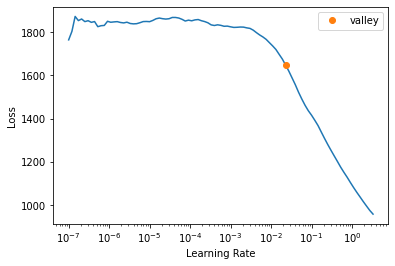

<Figure size 720x720 with 0 Axes>

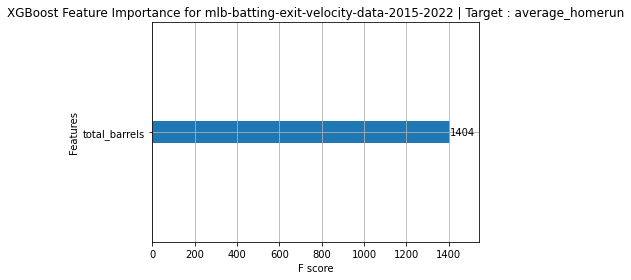

Target Variable: average_distance
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.28170164499364925, 'Adjusted R-Squared': 0.2780461826272047, 'RMSE': 17.855148903015284, 'Time taken': 0.07915139198303223}


 17%|█▋        | 7/42 [00:00<00:01, 30.10it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.09725792813420087, 'Adjusted R-Squared': 0.09266382089824265, 'RMSE': 20.01671851395114, 'Time taken': 0.04920792579650879}
{'Model': 'BayesianRidge', 'R-Squared': 0.27077146836414645, 'Adjusted R-Squared': 0.2670603816891549, 'RMSE': 17.990484797733608, 'Time taken': 0.011391401290893555}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.1854112778194228, 'Adjusted R-Squared': -0.19144390518746057, 'RMSE': 22.937472862884828, 'Time taken': 0.014223098754882812}
{'Model': 'DummyRegressor', 'R-Squared': -0.0015474439623297531, 'Adjusted R-Squared': -0.0066443775193898436, 'RMSE': 21.083698, 'Time taken': 0.011310338973999023}
{'Model': 'ElasticNet', 'R-Squared': 0.22700552144916764, 'Adjusted R-Squared': 0.22307170730895987, 'RMSE': 18.522484341694096, 'Time taken': 0.012065649032592773}
{'Model': 'ElasticNetCV', 'R-Squared': 0.2705568608185923, 'Adjusted R-Squared': 0.26684468199324174, 'RMSE': 17.993131848418443, 'Time taken': 0.0710067749

 31%|███       | 13/42 [00:01<00:02, 10.50it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -248313.5288478549, 'Adjusted R-Squared': -249577.21601756406, 'RMSE': 10498.133853653835, 'Time taken': 0.40376901626586914}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.19785773032345044, 'Adjusted R-Squared': 0.1937755813683536, 'RMSE': 18.868472433339456, 'Time taken': 0.02592015266418457}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.29910431851780406, 'Adjusted R-Squared': 0.2955374193754011, 'RMSE': 17.63752866047621, 'Time taken': 0.1519908905029297}


 36%|███▌      | 15/42 [00:01<00:03,  7.29it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.28098845838865905, 'Adjusted R-Squared': 0.2773293665738431, 'RMSE': 17.86401074548599, 'Time taken': 0.48466944694519043}
{'Model': 'HuberRegressor', 'R-Squared': 0.26836962470585846, 'Adjusted R-Squared': 0.2646463149079239, 'RMSE': 18.020087870156924, 'Time taken': 0.020164012908935547}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.18925131841073783, 'Adjusted R-Squared': 0.18512537092173398, 'RMSE': 18.969425, 'Time taken': 0.014429569244384766}


 50%|█████     | 21/42 [00:02<00:02, 10.20it/s]

{'Model': 'KernelRidge', 'R-Squared': -66.98629938840142, 'Adjusted R-Squared': -67.33228564483095, 'RMSE': 173.70876859619162, 'Time taken': 0.2519838809967041}
{'Model': 'Lars', 'R-Squared': 0.27085795913593746, 'Adjusted R-Squared': 0.2671473126175453, 'RMSE': 17.989417877702174, 'Time taken': 0.0188906192779541}
{'Model': 'LarsCV', 'R-Squared': 0.2704223387457767, 'Adjusted R-Squared': 0.2667094753297248, 'RMSE': 17.99479089603886, 'Time taken': 0.03880143165588379}
{'Model': 'Lasso', 'R-Squared': 0.2654005882786401, 'Adjusted R-Squared': 0.26166216888056704, 'RMSE': 18.056614598284153, 'Time taken': 0.034229278564453125}
{'Model': 'LassoCV', 'R-Squared': 0.2706546912698391, 'Adjusted R-Squared': 0.2669430103093803, 'RMSE': 17.991925218910225, 'Time taken': 0.0985112190246582}
{'Model': 'LassoLars', 'R-Squared': -0.001547465433513029, 'Adjusted R-Squared': -0.006644399099841269, 'RMSE': 21.08369905486515, 'Time taken': 0.014645099639892578}
{'Model': 'LassoLarsCV', 'R-Squared': 0.2

 64%|██████▍   | 27/42 [00:06<00:05,  2.66it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.8969818648966217, 'Adjusted R-Squared': -0.9066357166263754, 'RMSE': 29.01633989900247, 'Time taken': 3.941021680831909}


 67%|██████▋   | 28/42 [00:06<00:05,  2.78it/s]

{'Model': 'NuSVR', 'R-Squared': 0.27145829692663537, 'Adjusted R-Squared': 0.26775070556239433, 'RMSE': 17.9820105752296, 'Time taken': 0.22010397911071777}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.27194814209663654, 'Adjusted R-Squared': 0.26824304358313344, 'RMSE': 17.975964330998977, 'Time taken': 0.01759195327758789}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.27194814209663654, 'Adjusted R-Squared': 0.26824304358313344, 'RMSE': 17.975964330998977, 'Time taken': 0.01674485206604004}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.2333366131313065, 'Adjusted R-Squared': 0.22943501828719104, 'RMSE': 18.446475616140543, 'Time taken': 0.01166224479675293}
{'Model': 'PoissonRegressor', 'R-Squared': 0.26612050848539515, 'Adjusted R-Squared': 0.26238575280338705, 'RMSE': 18.047764531186782, 'Time taken': 0.017151832580566406}
{'Model': 'RANSACRegressor', 'R-Squared': 0.2602331958143552, 'Adjusted R-Squared': 0.25646847925361405, 'RMSE': 18.120011125963767, 

 81%|████████  | 34/42 [00:06<00:01,  4.45it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.12957032874232388, 'Adjusted R-Squared': 0.12514066120411693, 'RMSE': 19.65521885176828, 'Time taken': 0.3397097587585449}
{'Model': 'Ridge', 'R-Squared': 0.2708409747415268, 'Adjusted R-Squared': 0.2671302417885575, 'RMSE': 17.989627396267878, 'Time taken': 0.01274251937866211}
{'Model': 'RidgeCV', 'R-Squared': 0.2706781181243624, 'Adjusted R-Squared': 0.26696655638453726, 'RMSE': 17.99163626277769, 'Time taken': 0.013016223907470703}
{'Model': 'SGDRegressor', 'R-Squared': 0.26973274032879835, 'Adjusted R-Squared': 0.2660163675060442, 'RMSE': 18.003293245455303, 'Time taken': 0.013660192489624023}


 98%|█████████▊| 41/42 [00:07<00:00,  7.16it/s]

{'Model': 'SVR', 'R-Squared': 0.27522202402728524, 'Adjusted R-Squared': 0.2715335864905285, 'RMSE': 17.935501901429898, 'Time taken': 0.16573047637939453}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.27085795913593746, 'Adjusted R-Squared': 0.2671473126175453, 'RMSE': 17.989417877702177, 'Time taken': 0.015210390090942383}
{'Model': 'TweedieRegressor', 'R-Squared': 0.19785773032345044, 'Adjusted R-Squared': 0.1937755813683536, 'RMSE': 18.868472433339456, 'Time taken': 0.012479543685913086}
{'Model': 'XGBRegressor', 'R-Squared': 0.16877779664974402, 'Adjusted R-Squared': 0.1645476582103026, 'RMSE': 19.207445, 'Time taken': 0.10409164428710938}


100%|██████████| 42/42 [00:07<00:00,  5.81it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.2880593553513183, 'Adjusted R-Squared': 0.2844362477449638, 'RMSE': 17.775954672057235, 'Time taken': 0.13387393951416016}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: average_distance
average_distance
Target Standard Deviation: 19.661487579345703
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
GradientBoostingRegressor                    0.30       0.30    17.64   
LGBMRegressor                                0.28       0.29    17.78   
AdaBoostRegressor                            0.28       0.28    17.86   
HistGradientBoostingRegressor                0.28       0.28    17.86   
SVR                                          0.27       0.28    17.94   
OrthogonalMatchingPursuitCV                  0.27       0.27    17.98   
OrthogonalMatchingPursuit                    0.27       0.27    17.98   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,27009.830078,27172.871094,164.841949,00:01
1,16797.080078,5379.392090,73.344337,00:01
2,8983.797852,11166.517578,105.671745,00:01


Better model found at epoch 0 with _rmse value: 164.84194946289062.
Better model found at epoch 1 with _rmse value: 73.3443374633789.
No improvement since epoch 1: early stopping


,average_homerun,total_barrels,average_distance,average_distance_pred
0,29.00,9.00,146.00,101.24
1,66.00,6.00,173.00,98.00
2,20.00,13.00,147.00,101.85
3,46.00,30.00,143.00,102.81
4,37.00,12.00,157.00,101.11
5,38.00,48.00,212.00,105.18
6,36.00,20.00,183.00,108.27
7,37.00,6.00,156.00,100.31
8,38.00,16.00,147.00,104.99


<Figure size 432x288 with 0 Axes>

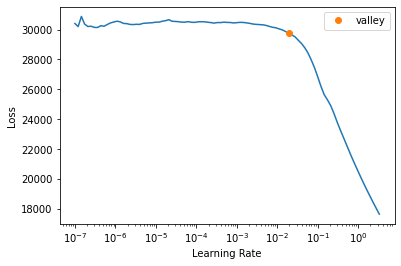

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  219.00     178.92
1  168.00     178.76
2  186.00     191.20
3  154.00     152.19
4  197.00     164.60
XGBoost RMSE:  19.236998


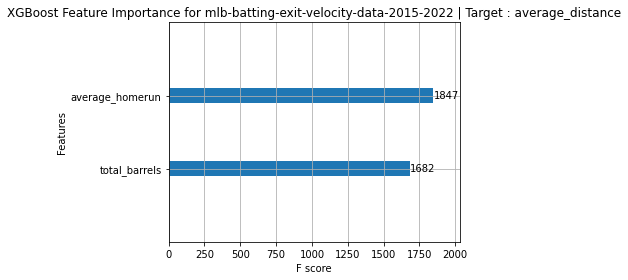

Target Variable: max_distance
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5978767104696254, 'Adjusted R-Squared': 0.5958302815152724, 'RMSE': 12.45312097786172, 'Time taken': 0.07362198829650879}


 17%|█▋        | 7/42 [00:00<00:01, 30.94it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.5229669585224652, 'Adjusted R-Squared': 0.5205393094564218, 'RMSE': 13.563532879012666, 'Time taken': 0.04944348335266113}
{'Model': 'BayesianRidge', 'R-Squared': 0.6565735670385726, 'Adjusted R-Squared': 0.6548258498224839, 'RMSE': 11.508413382306474, 'Time taken': 0.013541936874389648}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.3517630440624311, 'Adjusted R-Squared': 0.34846412825613304, 'RMSE': 15.811223842028042, 'Time taken': 0.013063669204711914}
{'Model': 'DummyRegressor', 'R-Squared': -0.0020560320311109326, 'Adjusted R-Squared': -0.007155553822617788, 'RMSE': 19.65824, 'Time taken': 0.009658098220825195}
{'Model': 'ElasticNet', 'R-Squared': 0.5986100370945856, 'Adjusted R-Squared': 0.5965673400823444, 'RMSE': 12.44176081461001, 'Time taken': 0.010406970977783203}
{'Model': 'ElasticNetCV', 'R-Squared': 0.6563639469397939, 'Adjusted R-Squared': 0.6546151629547547, 'RMSE': 11.511925090364352, 'Time taken': 0.07207584381103516}
{

 31%|███       | 13/42 [00:01<00:02, 10.50it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.3700868821996932, 'Adjusted R-Squared': 0.36688121747806324, 'RMSE': 15.586152460678662, 'Time taken': 0.3991820812225342}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.5396541441915395, 'Adjusted R-Squared': 0.5373114171899698, 'RMSE': 13.32418680173261, 'Time taken': 0.04796719551086426}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6642267306390945, 'Adjusted R-Squared': 0.662517960820464, 'RMSE': 11.37945999850163, 'Time taken': 0.13581061363220215}


 36%|███▌      | 15/42 [00:01<00:03,  7.41it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6341972838164773, 'Adjusted R-Squared': 0.6323356923855179, 'RMSE': 11.877418437598072, 'Time taken': 0.4645373821258545}
{'Model': 'HuberRegressor', 'R-Squared': 0.6545766332698706, 'Adjusted R-Squared': 0.6528187535409641, 'RMSE': 11.541824072327465, 'Time taken': 0.023980140686035156}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6167045271724405, 'Adjusted R-Squared': 0.6147539140791705, 'RMSE': 12.1580925, 'Time taken': 0.01490926742553711}


 50%|█████     | 21/42 [00:01<00:01, 10.86it/s]

{'Model': 'KernelRidge', 'R-Squared': -493.17232865713913, 'Adjusted R-Squared': -495.68720055870216, 'RMSE': 436.553832747601, 'Time taken': 0.21949267387390137}
{'Model': 'Lars', 'R-Squared': 0.6565834369423935, 'Adjusted R-Squared': 0.6548357699548231, 'RMSE': 11.50824800809757, 'Time taken': 0.0212862491607666}
{'Model': 'LarsCV', 'R-Squared': 0.6565834369423935, 'Adjusted R-Squared': 0.6548357699548231, 'RMSE': 11.50824800809757, 'Time taken': 0.05011701583862305}
{'Model': 'Lasso', 'R-Squared': 0.6525717205894754, 'Adjusted R-Squared': 0.6508036377426025, 'RMSE': 11.575271243027158, 'Time taken': 0.014538764953613281}
{'Model': 'LassoCV', 'R-Squared': 0.6565757320852026, 'Adjusted R-Squared': 0.6548280258871629, 'RMSE': 11.50837710628272, 'Time taken': 0.08324003219604492}
{'Model': 'LassoLars', 'R-Squared': -0.0020559969676960943, 'Adjusted R-Squared': -0.007155518580763243, 'RMSE': 19.65823803932773, 'Time taken': 0.01245260238647461}
{'Model': 'LassoLarsCV', 'R-Squared': 0.656

 64%|██████▍   | 27/42 [00:07<00:06,  2.20it/s]

{'Model': 'MLPRegressor', 'R-Squared': -34.0913158098169, 'Adjusted R-Squared': -34.26989756966329, 'RMSE': 116.33179261738175, 'Time taken': 4.955531120300293}


 69%|██████▉   | 29/42 [00:07<00:05,  2.57it/s]

{'Model': 'NuSVR', 'R-Squared': 0.6077820024349383, 'Adjusted R-Squared': 0.6057859820910958, 'RMSE': 12.298789060769911, 'Time taken': 0.20911598205566406}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5379862201035575, 'Adjusted R-Squared': 0.5356350049386901, 'RMSE': 13.34830305908618, 'Time taken': 0.011911869049072266}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6565834369423935, 'Adjusted R-Squared': 0.6548357699548231, 'RMSE': 11.50824800809757, 'Time taken': 0.017534732818603516}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6376658423288251, 'Adjusted R-Squared': 0.6358219025951295, 'RMSE': 11.820973195432689, 'Time taken': 0.0120849609375}
{'Model': 'PoissonRegressor', 'R-Squared': 0.6568454936694819, 'Adjusted R-Squared': 0.6550991603039322, 'RMSE': 11.50385627268972, 'Time taken': 0.012896537780761719}
{'Model': 'RANSACRegressor', 'R-Squared': 0.6463355407319011, 'Adjusted R-Squared': 0.6445357216007658, 'RMSE': 11.678694637795585, 'Time taken':

 81%|████████  | 34/42 [00:07<00:02,  3.79it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5372760415839413, 'Adjusted R-Squared': 0.534921212279025, 'RMSE': 13.358558205603588, 'Time taken': 0.3218085765838623}
{'Model': 'Ridge', 'R-Squared': 0.6565773194786952, 'Adjusted R-Squared': 0.6548296213589939, 'RMSE': 11.508350508942716, 'Time taken': 0.012064695358276367}
{'Model': 'RidgeCV', 'R-Squared': 0.6565773194787095, 'Adjusted R-Squared': 0.6548296213590082, 'RMSE': 11.508350508942478, 'Time taken': 0.01041722297668457}
{'Model': 'SGDRegressor', 'R-Squared': 0.6563165704410157, 'Adjusted R-Squared': 0.6545675453542015, 'RMSE': 11.512718627455797, 'Time taken': 0.014175176620483398}
{'Model': 'SVR', 'R-Squared': 0.6163261318508084, 'Adjusted R-Squared': 0.6143735930816014, 'RMSE': 12.164092223691894, 'Time taken': 0.16214323043823242}


 98%|█████████▊| 41/42 [00:07<00:00,  6.31it/s]

{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6565834369423935, 'Adjusted R-Squared': 0.6548357699548231, 'RMSE': 11.50824800809757, 'Time taken': 0.01482701301574707}
{'Model': 'TweedieRegressor', 'R-Squared': 0.5396541441915395, 'Adjusted R-Squared': 0.5373114171899698, 'RMSE': 13.32418680173261, 'Time taken': 0.013144254684448242}
{'Model': 'XGBRegressor', 'R-Squared': 0.5632070962376714, 'Adjusted R-Squared': 0.5609842315874815, 'RMSE': 12.978855, 'Time taken': 0.10347867012023926}


100%|██████████| 42/42 [00:08<00:00,  5.18it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.6374126557366682, 'Adjusted R-Squared': 0.6355674275215877, 'RMSE': 11.825102518052018, 'Time taken': 0.13206148147583008}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: max_distance
max_distance
Target Standard Deviation: 19.892274856567383
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
GradientBoostingRegressor                    0.66       0.66  11.38   
PoissonRegressor                             0.66       0.66  11.50   
LassoLarsIC                                  0.65       0.66  11.51   
LassoLarsCV                                  0.65       0.66  11.51   
OrthogonalMatchingPursuitCV                  0.65       0.66  11.51   
LarsCV                                       0.65       0.66  11.51   
Lars                                         0.65       0.66  11.51   
LinearRegression         

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,181834.781250,179463.781250,423.631622,00:01
1,143305.484375,44452.726562,210.838150,00:01
2,75647.109375,43139.449219,207.700378,00:01
3,42031.789062,22742.333984,150.805618,00:01
4,24502.923828,8450.370117,91.925896,00:01
5,14739.969727,3831.247070,61.897068,00:01
6,9074.317383,3612.389160,60.103153,00:01
7,5708.896973,2839.589600,53.287800,00:01
8,3639.195801,1885.932983,43.427330,00:01
9,2381.466309,998.255554,31.595181,00:01


Better model found at epoch 0 with _rmse value: 423.6316223144531.
Better model found at epoch 1 with _rmse value: 210.83815002441406.
Better model found at epoch 2 with _rmse value: 207.70037841796875.
Better model found at epoch 3 with _rmse value: 150.8056182861328.
Better model found at epoch 4 with _rmse value: 91.92589569091797.
Better model found at epoch 5 with _rmse value: 61.89706802368164.
Better model found at epoch 6 with _rmse value: 60.103153228759766.
Better model found at epoch 7 with _rmse value: 53.28779983520508.
Better model found at epoch 8 with _rmse value: 43.427330017089844.
Better model found at epoch 9 with _rmse value: 31.59518051147461.
Better model found at epoch 10 with _rmse value: 28.967025756835938.
Better model found at epoch 11 with _rmse value: 25.638446807861328.
Better model found at epoch 12 with _rmse value: 22.679258346557617.
Better model found at epoch 13 with _rmse value: 19.795015335083008.
Better model found at epoch 14 with _rmse value: 1

,average_homerun,total_barrels,max_distance,max_distance_pred
0,25.00,9.00,413.00,423.91
1,44.00,21.00,446.00,429.89
2,44.00,21.00,431.00,429.89
3,43.00,34.00,450.00,435.78
4,44.00,15.00,431.00,439.59
5,20.00,9.00,401.00,412.45
6,40.00,36.00,452.00,437.50
7,35.00,10.00,430.00,417.97
8,44.00,28.00,439.00,437.38


<Figure size 432x288 with 0 Axes>

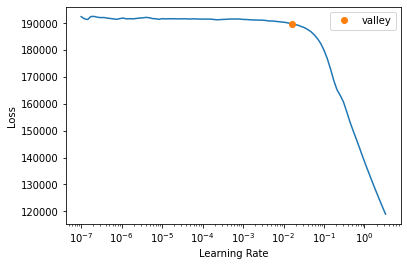

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  424.00     445.75
1  474.00     461.87
2  421.00     413.05
3  451.00     454.29
4  445.00     441.40
XGBoost RMSE:  12.92397


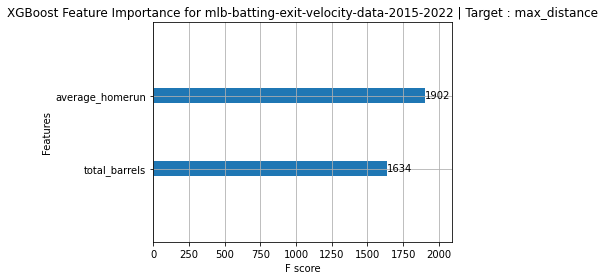

Target Variable: ground_ball_ev
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.06007144661066888, 'Adjusted R-Squared': 0.0552880951939293, 'RMSE': 2.4554830191167145, 'Time taken': 0.06175875663757324}


 17%|█▋        | 7/42 [00:00<00:01, 30.22it/s]

{'Model': 'BaggingRegressor', 'R-Squared': -0.3607355604731959, 'Adjusted R-Squared': -0.3676604233763672, 'RMSE': 2.9544482064599276, 'Time taken': 0.055655717849731445}
{'Model': 'BayesianRidge', 'R-Squared': 0.09323504570213725, 'Adjusted R-Squared': 0.08862046578204641, 'RMSE': 2.411775488463965, 'Time taken': 0.013219833374023438}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.9941243772522061, 'Adjusted R-Squared': -1.0042725929125225, 'RMSE': 3.576560986827065, 'Time taken': 0.014858722686767578}
{'Model': 'DummyRegressor', 'R-Squared': -0.0002080151778687256, 'Adjusted R-Squared': -0.0052981323034557715, 'RMSE': 2.532997, 'Time taken': 0.010772705078125}
{'Model': 'ElasticNet', 'R-Squared': 0.02814058689322796, 'Adjusted R-Squared': 0.02319473746265921, 'RMSE': 2.4968430077958677, 'Time taken': 0.01189565658569336}
{'Model': 'ElasticNetCV', 'R-Squared': 0.09327610319868485, 'Adjusted R-Squared': 0.08866173222259677, 'RMSE': 2.411720886340092, 'Time taken': 0.076067447662353

 24%|██▍       | 10/42 [00:00<00:01, 16.86it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.5610667728331791, 'Adjusted R-Squared': -0.569011133000269, 'RMSE': 3.164464686780772, 'Time taken': 0.2649984359741211}
{'Model': 'GammaRegressor', 'R-Squared': 0.07570377606310108, 'Adjusted R-Squared': 0.07099997848581407, 'RMSE': 2.434978343910598, 'Time taken': 0.013687372207641602}


 31%|███       | 13/42 [00:01<00:03,  8.58it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -271.0777561081516, 'Adjusted R-Squared': -272.46237573211164, 'RMSE': 41.7768828461618, 'Time taken': 0.45444488525390625}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.0757439784845213, 'Adjusted R-Squared': 0.07104038549970981, 'RMSE': 2.434925388436218, 'Time taken': 0.04205942153930664}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.052096672273459044, 'Adjusted R-Squared': 0.04727273676340038, 'RMSE': 2.465877725565936, 'Time taken': 0.14824247360229492}


 36%|███▌      | 15/42 [00:01<00:04,  6.63it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.0505606718205287, 'Adjusted R-Squared': -0.05590703656261775, 'RMSE': 2.595972473232171, 'Time taken': 0.4762246608734131}
{'Model': 'HuberRegressor', 'R-Squared': 0.09298262757509679, 'Adjusted R-Squared': 0.08836676308438485, 'RMSE': 2.4121111506926867, 'Time taken': 0.021407604217529297}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.09597068302660428, 'Adjusted R-Squared': -0.10154814197330442, 'RMSE': 2.651484, 'Time taken': 0.014451265335083008}


 45%|████▌     | 19/42 [00:02<00:02,  7.94it/s]

{'Model': 'KernelRidge', 'R-Squared': -1149.4931378461383, 'Adjusted R-Squared': -1155.3480647562967, 'RMSE': 85.90758885585349, 'Time taken': 0.27524352073669434}
{'Model': 'Lars', 'R-Squared': 0.09333551674660423, 'Adjusted R-Squared': 0.08872144812953864, 'RMSE': 2.411641870422291, 'Time taken': 0.06667876243591309}
{'Model': 'LarsCV', 'R-Squared': 0.09333551674660423, 'Adjusted R-Squared': 0.08872144812953864, 'RMSE': 2.411641870422291, 'Time taken': 0.05389761924743652}
{'Model': 'Lasso', 'R-Squared': -0.00020794852179895074, 'Adjusted R-Squared': -0.005298065308169342, 'RMSE': 2.5329969357731574, 'Time taken': 0.013379335403442383}


 50%|█████     | 21/42 [00:02<00:02,  9.51it/s]

{'Model': 'LassoCV', 'R-Squared': 0.09333139581885763, 'Adjusted R-Squared': 0.08871730623014962, 'RMSE': 2.4116473510553087, 'Time taken': 0.0874791145324707}
{'Model': 'LassoLars', 'R-Squared': -0.00020794852179895074, 'Adjusted R-Squared': -0.005298065308169342, 'RMSE': 2.5329969357731574, 'Time taken': 0.013195276260375977}
{'Model': 'LassoLarsCV', 'R-Squared': 0.09333551674660423, 'Adjusted R-Squared': 0.08872144812953864, 'RMSE': 2.411641870422291, 'Time taken': 0.023014068603515625}
{'Model': 'LassoLarsIC', 'R-Squared': 0.09333551674660423, 'Adjusted R-Squared': 0.08872144812953864, 'RMSE': 2.411641870422291, 'Time taken': 0.013320446014404297}
{'Model': 'LinearRegression', 'R-Squared': 0.09333551674660423, 'Adjusted R-Squared': 0.08872144812953864, 'RMSE': 2.411641870422291, 'Time taken': 0.013007879257202148}
{'Model': 'LinearSVR', 'R-Squared': 0.09182317808617002, 'Adjusted R-Squared': 0.08720141308915308, 'RMSE': 2.413652371361386, 'Time taken': 0.014083623886108398}


 64%|██████▍   | 27/42 [00:05<00:05,  2.72it/s]

{'Model': 'MLPRegressor', 'R-Squared': -4.452723973864292, 'Adjusted R-Squared': -4.480473205283449, 'RMSE': 5.914203588098276, 'Time taken': 3.4243228435516357}


 69%|██████▉   | 29/42 [00:05<00:04,  3.15it/s]

{'Model': 'NuSVR', 'R-Squared': 0.08687642781184757, 'Adjusted R-Squared': 0.08222948851318024, 'RMSE': 2.420216908535833, 'Time taken': 0.23195338249206543}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.0769771678610659, 'Adjusted R-Squared': 0.07227985064916298, 'RMSE': 2.4333004456079745, 'Time taken': 0.013002872467041016}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.09333551674660423, 'Adjusted R-Squared': 0.08872144812953864, 'RMSE': 2.411641870422291, 'Time taken': 0.01963186264038086}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.3641914023112658, 'Adjusted R-Squared': -0.3711338521958014, 'RMSE': 2.958197513679656, 'Time taken': 0.012537002563476562}
{'Model': 'PoissonRegressor', 'R-Squared': 0.09333332830008945, 'Adjusted R-Squared': 0.08871924854589153, 'RMSE': 2.411644780951025, 'Time taken': 0.014658212661743164}
{'Model': 'RANSACRegressor', 'R-Squared': -0.10225073159887321, 'Adjusted R-Squared': -0.10786015008029226, 'RMSE': 2.659069640328653

 81%|████████  | 34/42 [00:06<00:01,  4.53it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.30620537386872404, 'Adjusted R-Squared': -0.3128527294609311, 'RMSE': 2.8946445827532576, 'Time taken': 0.3622307777404785}
{'Model': 'Ridge', 'R-Squared': 0.09333272080147781, 'Adjusted R-Squared': 0.08871863795568391, 'RMSE': 2.411645588894372, 'Time taken': 0.012234210968017578}
{'Model': 'RidgeCV', 'R-Squared': 0.09330609355441566, 'Adjusted R-Squared': 0.08869187520100308, 'RMSE': 2.411681001560588, 'Time taken': 0.011034011840820312}
{'Model': 'SGDRegressor', 'R-Squared': 0.09359376172810818, 'Adjusted R-Squared': 0.08898100733486702, 'RMSE': 2.4112983923355067, 'Time taken': 0.011736154556274414}


 98%|█████████▊| 41/42 [00:06<00:00,  7.46it/s]

{'Model': 'SVR', 'R-Squared': 0.08809383483972333, 'Adjusted R-Squared': 0.08345309099666853, 'RMSE': 2.418603013180026, 'Time taken': 0.16707968711853027}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.09333551674660423, 'Adjusted R-Squared': 0.08872144812953864, 'RMSE': 2.411641870422291, 'Time taken': 0.01776409149169922}
{'Model': 'TweedieRegressor', 'R-Squared': 0.0757439784845213, 'Adjusted R-Squared': 0.07104038549970981, 'RMSE': 2.434925388436218, 'Time taken': 0.012897014617919922}
{'Model': 'XGBRegressor', 'R-Squared': -0.2655055953091636, 'Adjusted R-Squared': -0.2719458273463602, 'RMSE': 2.849191, 'Time taken': 0.10143828392028809}


100%|██████████| 42/42 [00:06<00:00,  6.09it/s]


{'Model': 'LGBMRegressor', 'R-Squared': -0.05279383546831129, 'Adjusted R-Squared': -0.058151564910898124, 'RMSE': 2.5987301216040457, 'Time taken': 0.13236713409423828}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: ground_ball_ev
ground_ball_ev
Target Standard Deviation: 2.6460354328155518
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SGDRegressor                                 0.09       0.09  2.41        0.01
LassoLarsIC                                  0.09       0.09  2.41        0.01
LassoLarsCV                                  0.09       0.09  2.41        0.02
LarsCV                                       0.09       0.09  2.41        0.05
Lars                                         0.09       0.09  2.41        0.07
LinearRegression                             0.09       0.09  2.41        0.01
TransformedTargetRegres

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5662.271973,5711.512207,75.574547,00:01
1,2848.422119,1221.350342,34.947826,00:01
2,1475.450073,1357.956421,36.850460,00:01


Better model found at epoch 0 with _rmse value: 75.57454681396484.
Better model found at epoch 1 with _rmse value: 34.94782638549805.
No improvement since epoch 1: early stopping


,average_homerun,total_barrels,ground_ball_ev,ground_ball_ev_pred
0,56.00,58.00,86.30,48.49
1,24.00,9.00,78.70,49.91
2,33.00,53.00,88.10,51.15
3,56.00,21.00,91.50,48.88
4,35.00,20.00,84.10,51.32
5,17.00,3.00,79.20,51.93
6,35.00,36.00,83.30,51.63
7,47.00,18.00,87.00,48.87
8,31.00,9.00,86.30,49.80


<Figure size 432x288 with 0 Axes>

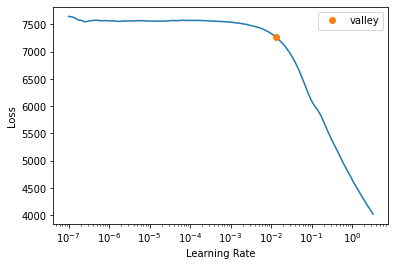

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   84.60      85.17
1   82.80      81.40
2   89.20      82.76
3   86.10      86.30
4   83.50      87.98
XGBoost RMSE:  2.8455772


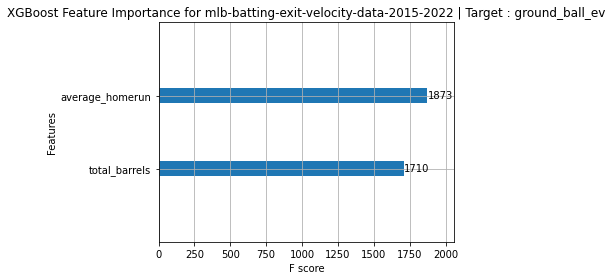

Target Variable: fly_ball_line_drive_ev
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.4646228506088934, 'Adjusted R-Squared': 0.46189828496313723, 'RMSE': 1.8386512994018345, 'Time taken': 0.058150529861450195}
{'Model': 'BaggingRegressor', 'R-Squared': 0.3760896406658868, 'Adjusted R-Squared': 0.37291452433339767, 'RMSE': 1.984863090325414, 'Time taken': 0.0499262809753418}


 17%|█▋        | 7/42 [00:00<00:01, 33.13it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.4967091248895976, 'Adjusted R-Squared': 0.4941478481714786, 'RMSE': 1.7827029607764322, 'Time taken': 0.01433873176574707}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.19051434268352008, 'Adjusted R-Squared': 0.18639482279895792, 'RMSE': 2.260861907473084, 'Time taken': 0.013635396957397461}
{'Model': 'DummyRegressor', 'R-Squared': -1.0369052122927158e-05, 'Adjusted R-Squared': -0.0050994803450090664, 'RMSE': 2.5128798, 'Time taken': 0.009156942367553711}
{'Model': 'ElasticNet', 'R-Squared': 0.38617360696203284, 'Adjusted R-Squared': 0.3830498085241806, 'RMSE': 1.968757549792121, 'Time taken': 0.009927749633789062}
{'Model': 'ElasticNetCV', 'R-Squared': 0.49674190718724576, 'Adjusted R-Squared': 0.49418079730015796, 'RMSE': 1.7826449008615275, 'Time taken': 0.06831789016723633}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.23959682214861966, 'Adjusted R-Squared': 0.23572708587456692, 'RMSE': 2.1912474268280127, 'Time taken': 0.01377463340

 26%|██▌       | 11/42 [00:00<00:02, 10.81it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -8.537945171843107, 'Adjusted R-Squared': -8.58648433302297, 'RMSE': 7.760628035180916, 'Time taken': 0.3824286460876465}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.4173667542884557, 'Adjusted R-Squared': 0.41440169960290085, 'RMSE': 1.9180816418763105, 'Time taken': 0.022146224975585938}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.505268805650251, 'Adjusted R-Squared': 0.5027510896484712, 'RMSE': 1.7674783587749148, 'Time taken': 0.1512746810913086}


 33%|███▎      | 14/42 [00:01<00:03,  7.46it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.48754751986066813, 'Adjusted R-Squared': 0.48493961919838147, 'RMSE': 1.7988554122876568, 'Time taken': 0.46948933601379395}
{'Model': 'HuberRegressor', 'R-Squared': 0.49601078792905606, 'Adjusted R-Squared': 0.49344595733327523, 'RMSE': 1.7839393191935802, 'Time taken': 0.02077651023864746}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.46234356970168566, 'Adjusted R-Squared': 0.4596074046619997, 'RMSE': 1.842561, 'Time taken': 0.013436555862426758}


 48%|████▊     | 20/42 [00:01<00:02, 10.39it/s]

{'Model': 'KernelRidge', 'R-Squared': -1363.4989761296426, 'Adjusted R-Squared': -1370.4429912753405, 'RMSE': 92.82309918478299, 'Time taken': 0.2552928924560547}
{'Model': 'Lars', 'R-Squared': 0.49666554311482414, 'Adjusted R-Squared': 0.4941040446065027, 'RMSE': 1.782780144449833, 'Time taken': 0.04092001914978027}
{'Model': 'LarsCV', 'R-Squared': 0.49666554311482414, 'Adjusted R-Squared': 0.4941040446065027, 'RMSE': 1.782780144449833, 'Time taken': 0.04287409782409668}
{'Model': 'Lasso', 'R-Squared': 0.3147229868600684, 'Adjusted R-Squared': 0.3112355720349288, 'RMSE': 2.0801877741943704, 'Time taken': 0.03230452537536621}


 55%|█████▍    | 23/42 [00:02<00:01, 12.69it/s]

{'Model': 'LassoCV', 'R-Squared': 0.4966926290859984, 'Adjusted R-Squared': 0.4941312684197694, 'RMSE': 1.7827321753702323, 'Time taken': 0.08217716217041016}
{'Model': 'LassoLars', 'R-Squared': -1.038810035813853e-05, 'Adjusted R-Squared': -0.005099499490181847, 'RMSE': 2.5128797885360927, 'Time taken': 0.013496160507202148}
{'Model': 'LassoLarsCV', 'R-Squared': 0.49666554311482414, 'Adjusted R-Squared': 0.4941040446065027, 'RMSE': 1.782780144449833, 'Time taken': 0.022696256637573242}
{'Model': 'LassoLarsIC', 'R-Squared': 0.49666554311482414, 'Adjusted R-Squared': 0.4941040446065027, 'RMSE': 1.782780144449833, 'Time taken': 0.014434337615966797}
{'Model': 'LinearRegression', 'R-Squared': 0.49666554311482414, 'Adjusted R-Squared': 0.4941040446065027, 'RMSE': 1.782780144449833, 'Time taken': 0.011663198471069336}
{'Model': 'LinearSVR', 'R-Squared': 0.49302302262898823, 'Adjusted R-Squared': 0.49044298712073886, 'RMSE': 1.7892193091595632, 'Time taken': 0.014376163482666016}


 64%|██████▍   | 27/42 [00:05<00:06,  2.45it/s]

{'Model': 'MLPRegressor', 'R-Squared': -4.093151046173419, 'Adjusted R-Squared': -4.119070389919848, 'RMSE': 5.67104032694179, 'Time taken': 3.8185951709747314}


 69%|██████▉   | 29/42 [00:06<00:04,  2.86it/s]

{'Model': 'NuSVR', 'R-Squared': 0.5208621100212851, 'Adjusted R-Squared': 0.5184237492580347, 'RMSE': 1.7394010004022495, 'Time taken': 0.23484516143798828}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.40407128299715867, 'Adjusted R-Squared': 0.40103856688009587, 'RMSE': 1.939843145260418, 'Time taken': 0.01146554946899414}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.49666554311482414, 'Adjusted R-Squared': 0.4941040446065027, 'RMSE': 1.782780144449833, 'Time taken': 0.01756429672241211}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.5505332591269767, 'Adjusted R-Squared': -0.5584240136263505, 'RMSE': 3.129031971732005, 'Time taken': 0.010845661163330078}
{'Model': 'PoissonRegressor', 'R-Squared': 0.49604570913570045, 'Adjusted R-Squared': 0.49348105625598393, 'RMSE': 1.7838775139095675, 'Time taken': 0.011819601058959961}
{'Model': 'RANSACRegressor', 'R-Squared': 0.4330401230341848, 'Adjusted R-Squared': 0.43015483103944785, 'RMSE': 1.8921066856635653, 'T

 81%|████████  | 34/42 [00:06<00:01,  4.30it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.39950324886118105, 'Adjusted R-Squared': 0.3964472857510599, 'RMSE': 1.947263792164636, 'Time taken': 0.3210930824279785}
{'Model': 'Ridge', 'R-Squared': 0.4966850997733805, 'Adjusted R-Squared': 0.494123700790039, 'RMSE': 1.782745509863664, 'Time taken': 0.01083993911743164}
{'Model': 'RidgeCV', 'R-Squared': 0.4966850997733675, 'Adjusted R-Squared': 0.4941237007900259, 'RMSE': 1.7827455098636869, 'Time taken': 0.010973930358886719}
{'Model': 'SGDRegressor', 'R-Squared': 0.4959732191723172, 'Adjusted R-Squared': 0.49340819738693464, 'RMSE': 1.7840058078522556, 'Time taken': 0.011461019515991211}
{'Model': 'SVR', 'R-Squared': 0.5234567125403794, 'Adjusted R-Squared': 0.5210315558611955, 'RMSE': 1.7346850505425617, 'Time taken': 0.16658425331115723}


 98%|█████████▊| 41/42 [00:06<00:00,  7.10it/s]

{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.49666554311482414, 'Adjusted R-Squared': 0.4941040446065027, 'RMSE': 1.782780144449833, 'Time taken': 0.013230323791503906}
{'Model': 'TweedieRegressor', 'R-Squared': 0.4173667542884557, 'Adjusted R-Squared': 0.41440169960290085, 'RMSE': 1.9180816418763105, 'Time taken': 0.012843132019042969}
{'Model': 'XGBRegressor', 'R-Squared': 0.40211546841740287, 'Adjusted R-Squared': 0.3990727990454813, 'RMSE': 1.9430238, 'Time taken': 0.12190794944763184}


100%|██████████| 42/42 [00:07<00:00,  5.63it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.4840538490369317, 'Adjusted R-Squared': 0.4814281688793589, 'RMSE': 1.8049768907284798, 'Time taken': 0.5549252033233643}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: fly_ball_line_drive_ev
fly_ball_line_drive_ev
Target Standard Deviation: 2.6378135681152344
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SVR                                          0.52       0.52  1.73        0.17
NuSVR                                        0.52       0.52  1.74        0.23
GradientBoostingRegressor                    0.50       0.51  1.77        0.15
ElasticNetCV                                 0.49       0.50  1.78        0.07
BayesianRidge                                0.49       0.50  1.78        0.01
LassoCV                                      0.49       0.50  1.78        0.08
Ridge        

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5718.252441,6283.045410,79.265663,00:01
1,2795.444580,1059.520508,32.550278,00:01
2,1451.933228,1195.067627,34.569752,00:01


Better model found at epoch 0 with _rmse value: 79.26566314697266.
Better model found at epoch 1 with _rmse value: 32.55027770996094.
No improvement since epoch 1: early stopping


,average_homerun,total_barrels,fly_ball_line_drive_ev,fly_ball_line_drive_ev_pred
0,45.00,53.00,94.30,59.07
1,44.00,5.00,93.30,61.24
2,53.00,52.00,98.20,67.66
3,28.00,15.00,90.40,61.49
4,58.00,5.00,89.60,61.30
5,46.00,15.00,91.10,62.30
6,46.00,25.00,92.70,58.28
7,39.00,16.00,91.80,57.69
8,41.00,28.00,91.80,52.95


<Figure size 432x288 with 0 Axes>

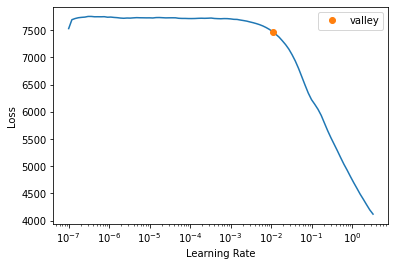

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   91.50      92.22
1   91.90      91.18
2   98.50      95.75
3   91.30      91.12
4   95.30      91.55
XGBoost RMSE:  1.943508


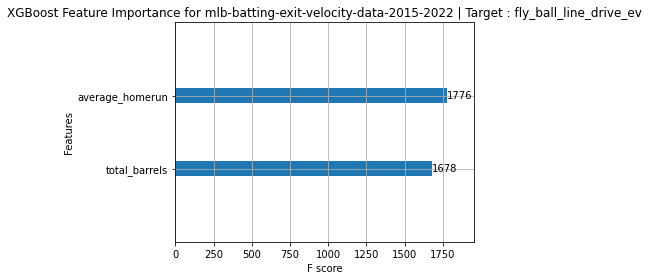

Target Variable: average_ev
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983

  5%|▍         | 2/42 [00:00<00:02, 19.64it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.404163329444442, 'Adjusted R-Squared': 0.4011310817571364, 'RMSE': 1.6722582927061056, 'Time taken': 0.05479598045349121}
{'Model': 'BaggingRegressor', 'R-Squared': 0.2695026442852684, 'Adjusted R-Squared': 0.2657851004902825, 'RMSE': 1.8516080843053906, 'Time taken': 0.046811819076538086}


 17%|█▋        | 7/42 [00:00<00:01, 32.64it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.39733762165000996, 'Adjusted R-Squared': 0.39427063753626956, 'RMSE': 1.681809435823407, 'Time taken': 0.01497197151184082}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.036314343053527764, 'Adjusted R-Squared': -0.041588207394767096, 'RMSE': 2.205390496137218, 'Time taken': 0.01382899284362793}
{'Model': 'DummyRegressor', 'R-Squared': -0.0021044695382348433, 'Adjusted R-Squared': -0.007204237831050175, 'RMSE': 2.168684, 'Time taken': 0.009482622146606445}
{'Model': 'ElasticNet', 'R-Squared': 0.2793855701382658, 'Adjusted R-Squared': 0.2757183211313359, 'RMSE': 1.8390401944230224, 'Time taken': 0.010432958602905273}
{'Model': 'ElasticNetCV', 'R-Squared': 0.39735838626885434, 'Adjusted R-Squared': 0.39429150782747446, 'RMSE': 1.6817804623600114, 'Time taken': 0.07408571243286133}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.03461006947136713, 'Adjusted R-Squared': -0.03987526066460556, 'RMSE': 2.203576309468162, 'Time taken': 0.015847682

 31%|███       | 13/42 [00:01<00:02, 10.31it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -26553.350216609153, 'Adjusted R-Squared': -26688.48685893286, 'RMSE': 353.02672479600955, 'Time taken': 0.4437074661254883}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.3281029772801216, 'Adjusted R-Squared': 0.32468365400928256, 'RMSE': 1.7757879412594482, 'Time taken': 0.04239916801452637}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.3973714145842233, 'Adjusted R-Squared': 0.3943046024447029, 'RMSE': 1.6817622833260986, 'Time taken': 0.13294315338134766}


 36%|███▌      | 15/42 [00:01<00:03,  7.41it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.3606745592270285, 'Adjusted R-Squared': 0.3574209946429422, 'RMSE': 1.7322107821972341, 'Time taken': 0.4570503234863281}
{'Model': 'HuberRegressor', 'R-Squared': 0.39764119694470956, 'Adjusted R-Squared': 0.39457575774341036, 'RMSE': 1.6813857988714351, 'Time taken': 0.021444320678710938}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.3389198101465771, 'Adjusted R-Squared': 0.33555553437124164, 'RMSE': 1.7614359, 'Time taken': 0.016013622283935547}


 50%|█████     | 21/42 [00:02<00:02,  9.74it/s]

{'Model': 'KernelRidge', 'R-Squared': -1679.084337919517, 'Adjusted R-Squared': -1687.634385440736, 'RMSE': 88.79842969595548, 'Time taken': 0.3370063304901123}
{'Model': 'Lars', 'R-Squared': 0.397322942569973, 'Adjusted R-Squared': 0.39425588375353526, 'RMSE': 1.6818299176602327, 'Time taken': 0.025813579559326172}
{'Model': 'LarsCV', 'R-Squared': 0.397322942569973, 'Adjusted R-Squared': 0.39425588375353526, 'RMSE': 1.6818299176602327, 'Time taken': 0.02892017364501953}
{'Model': 'Lasso', 'R-Squared': 0.1828476949170782, 'Adjusted R-Squared': 0.17868915901334836, 'RMSE': 1.9583542248519696, 'Time taken': 0.024319171905517578}
{'Model': 'LassoCV', 'R-Squared': 0.3973476951157704, 'Adjusted R-Squared': 0.3942807622664868, 'RMSE': 1.6817953800923946, 'Time taken': 0.0970451831817627}
{'Model': 'LassoLars', 'R-Squared': -0.0021044729317090116, 'Adjusted R-Squared': -0.007204241241794085, 'RMSE': 2.1686838458925606, 'Time taken': 0.017731666564941406}
{'Model': 'LassoLarsCV', 'R-Squared': 

 64%|██████▍   | 27/42 [00:05<00:05,  2.77it/s]

{'Model': 'MLPRegressor', 'R-Squared': -5.379601643569625, 'Adjusted R-Squared': -5.412067809694661, 'RMSE': 5.471879498722217, 'Time taken': 3.718717336654663}


 67%|██████▋   | 28/42 [00:06<00:04,  2.88it/s]

{'Model': 'NuSVR', 'R-Squared': 0.4241011191287818, 'Adjusted R-Squared': 0.4211703360200224, 'RMSE': 1.6440418232235512, 'Time taken': 0.22878718376159668}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.3568546444600996, 'Adjusted R-Squared': 0.3535816401062071, 'RMSE': 1.7373779808520082, 'Time taken': 0.012126684188842773}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.397322942569973, 'Adjusted R-Squared': 0.39425588375353526, 'RMSE': 1.6818299176602327, 'Time taken': 0.016321659088134766}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.22336931370431645, 'Adjusted R-Squared': -0.22959511173843494, 'RMSE': 2.3961750155056727, 'Time taken': 0.011296272277832031}
{'Model': 'PoissonRegressor', 'R-Squared': 0.39670902958523147, 'Adjusted R-Squared': 0.3936388465296856, 'RMSE': 1.6826862920725947, 'Time taken': 0.012550592422485352}
{'Model': 'RANSACRegressor', 'R-Squared': 0.2937352532706644, 'Adjusted R-Squared': 0.2901410306409986, 'RMSE': 1.8206376045196289, 

 81%|████████  | 34/42 [00:06<00:01,  4.64it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.2638491800237349, 'Adjusted R-Squared': 0.2601028654182578, 'RMSE': 1.858759256422271, 'Time taken': 0.3225064277648926}
{'Model': 'Ridge', 'R-Squared': 0.3973281798454378, 'Adjusted R-Squared': 0.3942611476818013, 'RMSE': 1.6818226100768505, 'Time taken': 0.013779401779174805}
{'Model': 'RidgeCV', 'R-Squared': 0.39732817984541824, 'Adjusted R-Squared': 0.3942611476817818, 'RMSE': 1.6818226100768778, 'Time taken': 0.011629581451416016}
{'Model': 'SGDRegressor', 'R-Squared': 0.39730590165498747, 'Adjusted R-Squared': 0.3942387561163361, 'RMSE': 1.6818536946712408, 'Time taken': 0.012199878692626953}


 98%|█████████▊| 41/42 [00:06<00:00,  7.46it/s]

{'Model': 'SVR', 'R-Squared': 0.4263940867830218, 'Adjusted R-Squared': 0.4234749727208489, 'RMSE': 1.640765645165576, 'Time taken': 0.1678788661956787}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.397322942569973, 'Adjusted R-Squared': 0.39425588375353526, 'RMSE': 1.6818299176602327, 'Time taken': 0.014469385147094727}
{'Model': 'TweedieRegressor', 'R-Squared': 0.3281029772801216, 'Adjusted R-Squared': 0.32468365400928256, 'RMSE': 1.7757879412594482, 'Time taken': 0.012604475021362305}
{'Model': 'XGBRegressor', 'R-Squared': 0.28742364990090796, 'Adjusted R-Squared': 0.2837973071523121, 'RMSE': 1.8287547, 'Time taken': 0.09329700469970703}


100%|██████████| 42/42 [00:07<00:00,  5.96it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.3598592858071069, 'Adjusted R-Squared': 0.35660157224887334, 'RMSE': 1.733314895520952, 'Time taken': 0.13659262657165527}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: average_ev
average_ev
Target Standard Deviation: 2.203599214553833
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
SVR                                          0.42       0.43   1.64   
NuSVR                                        0.42       0.42   1.64   
AdaBoostRegressor                            0.40       0.40   1.67   
HuberRegressor                               0.39       0.40   1.68   
GradientBoostingRegressor                    0.39       0.40   1.68   
ElasticNetCV                                 0.39       0.40   1.68   
LassoCV                                      0.39       0.40   1.68   
BayesianRidge                 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5842.750488,5874.786621,76.647156,00:01
1,2938.730957,1186.725342,34.448879,00:01
2,1519.254028,1163.476562,34.109772,00:01
3,848.882751,388.203247,19.702873,00:01
4,497.695404,201.043900,14.178995,00:01
5,300.623840,85.378189,9.240032,00:01
6,185.010300,45.256580,6.727301,00:01
7,115.369202,25.529213,5.052644,00:01
8,73.349403,15.601159,3.949830,00:01
9,47.858231,18.926847,4.350500,00:01


Better model found at epoch 0 with _rmse value: 76.64715576171875.
Better model found at epoch 1 with _rmse value: 34.44887924194336.
Better model found at epoch 2 with _rmse value: 34.109771728515625.
Better model found at epoch 3 with _rmse value: 19.70287322998047.
Better model found at epoch 4 with _rmse value: 14.178995132446289.
Better model found at epoch 5 with _rmse value: 9.240032196044922.
Better model found at epoch 6 with _rmse value: 6.727301120758057.
Better model found at epoch 7 with _rmse value: 5.0526442527771.
Better model found at epoch 8 with _rmse value: 3.9498302936553955.
No improvement since epoch 8: early stopping


,average_homerun,total_barrels,average_ev,average_ev_pred
0,49.00,26.00,88.50,85.81
1,40.00,22.00,89.20,86.64
2,47.00,28.00,90.90,85.26
3,34.00,6.00,83.90,85.53
4,36.00,16.00,91.10,85.66
5,55.00,47.00,89.40,85.95
6,41.00,26.00,88.80,85.14
7,55.00,33.00,95.90,85.22
8,24.00,4.00,89.60,85.63


<Figure size 432x288 with 0 Axes>

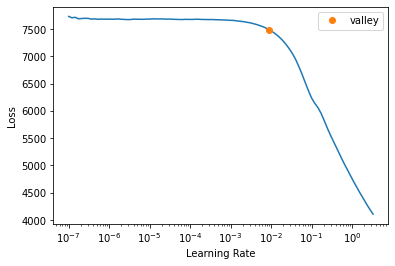

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   86.50      91.50
1   87.60      90.15
2   89.00      89.67
3   88.30      89.58
4   92.00      94.02
XGBoost RMSE:  1.8243903


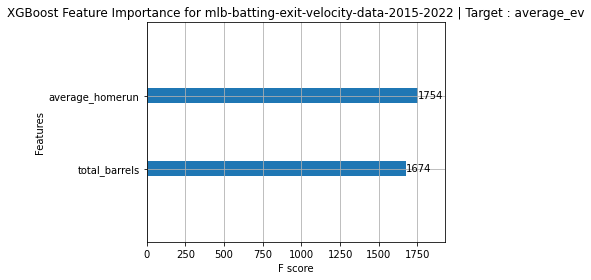

Target Variable: max_ev
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.4315967233399661, 'Adjusted R-Squared': 0.42870408579971153, 'RMSE': 2.470504913496855, 'Time taken': 0.0554811954498291}
{'Model': 'BaggingRegressor', 'R-Squared': 0.19077382884032312, 'Adjusted R-Squared': 0.18665562949599912, 'RMSE': 2.9477618606814158, 'Time taken': 0.047863006591796875}


 17%|█▋        | 7/42 [00:00<00:01, 32.23it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.42369963933808485, 'Adjusted R-Squared': 0.4207668130751744, 'RMSE': 2.487607635941505, 'Time taken': 0.012764215469360352}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.03432446605861328, 'Adjusted R-Squared': -0.03958820379936956, 'RMSE': 3.332620292238741, 'Time taken': 0.014216423034667969}
{'Model': 'DummyRegressor', 'R-Squared': -9.205751551188968e-05, 'Adjusted R-Squared': -0.005181584525768779, 'RMSE': 3.2770076, 'Time taken': 0.011303901672363281}
{'Model': 'ElasticNet', 'R-Squared': 0.3388559498395054, 'Adjusted R-Squared': 0.33549134907532985, 'RMSE': 2.6644371633696435, 'Time taken': 0.01250314712524414}
{'Model': 'ElasticNetCV', 'R-Squared': 0.4238496133492009, 'Adjusted R-Squared': 0.4209175503128101, 'RMSE': 2.4872839325432072, 'Time taken': 0.07243061065673828}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.07134358669993901, 'Adjusted R-Squared': -0.07679571691215248, 'RMSE': 3.391734294368973, 'Time taken': 0.01308608055

 31%|███       | 13/42 [00:01<00:02, 10.73it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -176356.16029083868, 'Adjusted R-Squared': -177253.6522007157, 'RMSE': 1376.1126405204695, 'Time taken': 0.39371347427368164}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.357240865348857, 'Adjusted R-Squared': 0.35396982649567055, 'RMSE': 2.6271300027914775, 'Time taken': 0.042754411697387695}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.40370174780871204, 'Adjusted R-Squared': 0.4006671511054485, 'RMSE': 2.5304001447899735, 'Time taken': 0.13691186904907227}


 36%|███▌      | 15/42 [00:01<00:03,  7.42it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.40475544496333027, 'Adjusted R-Squared': 0.40172621058655333, 'RMSE': 2.52816346680672, 'Time taken': 0.47261953353881836}
{'Model': 'HuberRegressor', 'R-Squared': 0.4215227273971548, 'Adjusted R-Squared': 0.418578822701975, 'RMSE': 2.4923015411018317, 'Time taken': 0.025911808013916016}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.33487400915545484, 'Adjusted R-Squared': 0.3314891440620984, 'RMSE': 2.6724489, 'Time taken': 0.01392054557800293}


 45%|████▌     | 19/42 [00:01<00:02,  8.60it/s]

{'Model': 'KernelRidge', 'R-Squared': -1144.4523243725534, 'Adjusted R-Squared': -1150.2815982879354, 'RMSE': 110.90367677260758, 'Time taken': 0.28462910652160645}
{'Model': 'Lars', 'R-Squared': 0.42366929456127544, 'Adjusted R-Squared': 0.42073631387201993, 'RMSE': 2.4876731268816585, 'Time taken': 0.06980586051940918}
{'Model': 'LarsCV', 'R-Squared': 0.42366929456127544, 'Adjusted R-Squared': 0.42073631387201993, 'RMSE': 2.4876731268816585, 'Time taken': 0.04245734214782715}
{'Model': 'Lasso', 'R-Squared': 0.30138721269945, 'Adjusted R-Squared': 0.2978319313391419, 'RMSE': 2.7388970035502926, 'Time taken': 0.013064861297607422}


 52%|█████▏    | 22/42 [00:02<00:01, 11.57it/s]

{'Model': 'LassoCV', 'R-Squared': 0.4238005234036576, 'Adjusted R-Squared': 0.4208682105456609, 'RMSE': 2.4873898927533302, 'Time taken': 0.0828239917755127}
{'Model': 'LassoLars', 'R-Squared': -9.203103501409515e-05, 'Adjusted R-Squared': -0.005181557910510337, 'RMSE': 3.27700737616335, 'Time taken': 0.011532068252563477}
{'Model': 'LassoLarsCV', 'R-Squared': 0.42366929456127544, 'Adjusted R-Squared': 0.42073631387201993, 'RMSE': 2.4876731268816585, 'Time taken': 0.020091533660888672}
{'Model': 'LassoLarsIC', 'R-Squared': 0.42366929456127544, 'Adjusted R-Squared': 0.42073631387201993, 'RMSE': 2.4876731268816585, 'Time taken': 0.015241146087646484}
{'Model': 'LinearRegression', 'R-Squared': 0.42366929456127544, 'Adjusted R-Squared': 0.42073631387201993, 'RMSE': 2.4876731268816585, 'Time taken': 0.026027202606201172}
{'Model': 'LinearSVR', 'R-Squared': 0.4126070240353934, 'Adjusted R-Squared': 0.4096177468040214, 'RMSE': 2.511434234547009, 'Time taken': 0.01407933235168457}


 64%|██████▍   | 27/42 [00:05<00:05,  2.54it/s]

{'Model': 'MLPRegressor', 'R-Squared': -8.587436036251326, 'Adjusted R-Squared': -8.636227059336573, 'RMSE': 10.146322806266566, 'Time taken': 3.612828493118286}


 69%|██████▉   | 29/42 [00:06<00:04,  2.97it/s]

{'Model': 'NuSVR', 'R-Squared': 0.4359386584849865, 'Adjusted R-Squared': 0.43306811730679307, 'RMSE': 2.4610509429089817, 'Time taken': 0.22823286056518555}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.3326299217849954, 'Adjusted R-Squared': 0.3292336363996774, 'RMSE': 2.676953338019616, 'Time taken': 0.011197805404663086}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.42366929456127544, 'Adjusted R-Squared': 0.42073631387201993, 'RMSE': 2.4876731268816585, 'Time taken': 0.01821732521057129}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.3415630137400205, 'Adjusted R-Squared': -0.34839030643080937, 'RMSE': 3.79544737164832, 'Time taken': 0.01070094108581543}
{'Model': 'PoissonRegressor', 'R-Squared': 0.4247652799190924, 'Adjusted R-Squared': 0.4218378767634644, 'RMSE': 2.48530664638057, 'Time taken': 0.011862754821777344}
{'Model': 'RANSACRegressor', 'R-Squared': 0.39606577769333207, 'Adjusted R-Squared': 0.3929923210912626, 'RMSE': 2.5465502802187903, 'Time

 81%|████████  | 34/42 [00:06<00:01,  4.46it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.23660349703975825, 'Adjusted R-Squared': 0.23271852755904465, 'RMSE': 2.863073641054388, 'Time taken': 0.31571459770202637}
{'Model': 'Ridge', 'R-Squared': 0.4236785275982824, 'Adjusted R-Squared': 0.4207455938964926, 'RMSE': 2.487653200067229, 'Time taken': 0.011794090270996094}
{'Model': 'RidgeCV', 'R-Squared': 0.42375361421964486, 'Adjusted R-Squared': 0.4208210626380655, 'RMSE': 2.487491141591821, 'Time taken': 0.010690689086914062}
{'Model': 'SGDRegressor', 'R-Squared': 0.4242398901568337, 'Adjusted R-Squared': 0.4213098132619576, 'RMSE': 2.486441362876574, 'Time taken': 0.01099538803100586}


 98%|█████████▊| 41/42 [00:06<00:00,  7.46it/s]

{'Model': 'SVR', 'R-Squared': 0.422097749020358, 'Adjusted R-Squared': 0.41915677064387136, 'RMSE': 2.4910625264816937, 'Time taken': 0.16765999794006348}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.42366929456127544, 'Adjusted R-Squared': 0.42073631387201993, 'RMSE': 2.4876731268816585, 'Time taken': 0.013479948043823242}
{'Model': 'TweedieRegressor', 'R-Squared': 0.357240865348857, 'Adjusted R-Squared': 0.35396982649567055, 'RMSE': 2.6271300027914775, 'Time taken': 0.011341333389282227}
{'Model': 'XGBRegressor', 'R-Squared': 0.2392491476169608, 'Adjusted R-Squared': 0.23537764200686906, 'RMSE': 2.858108, 'Time taken': 0.09775424003601074}


100%|██████████| 42/42 [00:06<00:00,  6.11it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.4072282116022491, 'Adjusted R-Squared': 0.4042115612796142, 'RMSE': 2.5229067497929663, 'Time taken': 0.13110637664794922}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: max_ev
max_ev
Target Standard Deviation: 3.176738977432251
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
NuSVR                                        0.43       0.44    2.46   
AdaBoostRegressor                            0.43       0.43    2.47   
PoissonRegressor                             0.42       0.42    2.49   
SGDRegressor                                 0.42       0.42    2.49   
ElasticNetCV                                 0.42       0.42    2.49   
LassoCV                                      0.42       0.42    2.49   
RidgeCV                                      0.42       0.42    2.49   
BayesianRidge                

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,9472.565430,9457.168945,97.247978,00:01
1,4960.518555,1679.506592,40.981785,00:01
2,2573.086426,2132.846924,46.182755,00:01


Better model found at epoch 0 with _rmse value: 97.24797821044922.
Better model found at epoch 1 with _rmse value: 40.98178482055664.
No improvement since epoch 1: early stopping


,average_homerun,total_barrels,max_ev,max_ev_pred
0,37.00,31.00,112.60,70.17
1,32.00,9.00,102.20,70.28
2,45.00,21.00,109.30,69.00
3,45.00,36.00,112.70,68.82
4,39.00,31.00,112.90,67.91
5,44.00,48.00,111.40,72.78
6,47.00,23.00,109.50,74.12
7,45.00,22.00,112.80,68.66
8,45.00,28.00,112.60,69.83


<Figure size 432x288 with 0 Axes>

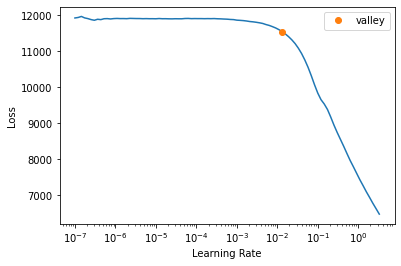

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  112.60     112.31
1  108.30     111.98
2  111.90     111.25
3  111.20     110.67
4  111.60     115.58
XGBoost RMSE:  2.8571074


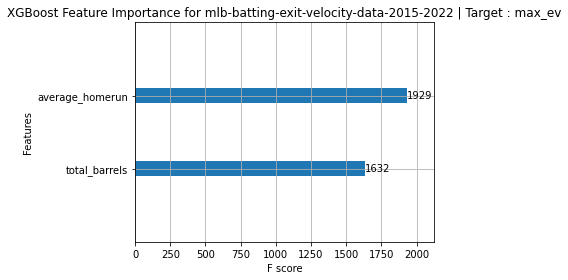

Target Variable: sweet_spot_percentage
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'launch_angle', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'launch_angle', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983


  5%|▍         | 2/42 [00:00<00:02, 18.82it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.037407235392436844, 'Adjusted R-Squared': 0.032508544478403456, 'RMSE': 4.061146450110056, 'Time taken': 0.05845379829406738}
{'Model': 'BaggingRegressor', 'R-Squared': -0.12583716253231692, 'Adjusted R-Squared': -0.13156661374113265, 'RMSE': 4.392028449014214, 'Time taken': 0.047560930252075195}


 17%|█▋        | 7/42 [00:00<00:01, 31.21it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.059094641953440274, 'Adjusted R-Squared': 0.05430631952063336, 'RMSE': 4.015136602098844, 'Time taken': 0.014352798461914062}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.5524257824548495, 'Adjusted R-Squared': -0.5603261681161973, 'RMSE': 5.157423299467783, 'Time taken': 0.015139341354370117}
{'Model': 'DummyRegressor', 'R-Squared': -0.002130066134381714, 'Adjusted R-Squared': -0.007229964689772883, 'RMSE': 4.1437106, 'Time taken': 0.011339426040649414}
{'Model': 'ElasticNet', 'R-Squared': 0.02771459315252589, 'Adjusted R-Squared': 0.02276657581487973, 'RMSE': 4.081541702753456, 'Time taken': 0.01174163818359375}
{'Model': 'ElasticNetCV', 'R-Squared': 0.05927564974624133, 'Adjusted R-Squared': 0.05448824847268541, 'RMSE': 4.014750375171423, 'Time taken': 0.07595300674438477}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.46025162134345043, 'Adjusted R-Squared': -0.4676829273044858, 'RMSE': 5.00197138677002, 'Time taken': 0.0176973342895

 31%|███       | 13/42 [00:01<00:02, 10.69it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1227975.1420631686, 'Adjusted R-Squared': -1234224.3845164161, 'RMSE': 4586.932181533187, 'Time taken': 0.37491321563720703}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.03545259163062364, 'Adjusted R-Squared': 0.03054395342009253, 'RMSE': 4.065267647137924, 'Time taken': 0.04663276672363281}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.06718703361192391, 'Adjusted R-Squared': 0.06243989383386761, 'RMSE': 3.9978329366029084, 'Time taken': 0.14028573036193848}


 36%|███▌      | 15/42 [00:01<00:03,  7.51it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.03799266435120219, 'Adjusted R-Squared': 0.03309695271940172, 'RMSE': 4.059911309756022, 'Time taken': 0.4636061191558838}
{'Model': 'HuberRegressor', 'R-Squared': 0.06288648365182314, 'Adjusted R-Squared': 0.0581174581233338, 'RMSE': 4.007037948940815, 'Time taken': 0.020140647888183594}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.05482916324787368, 'Adjusted R-Squared': -0.06019725059264647, 'RMSE': 4.2512674, 'Time taken': 0.013378620147705078}


 50%|█████     | 21/42 [00:02<00:02,  9.82it/s]

{'Model': 'KernelRidge', 'R-Squared': -65.5042711604423, 'Adjusted R-Squared': -65.84271528848527, 'RMSE': 33.7560890297123, 'Time taken': 0.3343791961669922}
{'Model': 'Lars', 'R-Squared': 0.059400626752092456, 'Adjusted R-Squared': 0.054613861493833404, 'RMSE': 4.014483682730243, 'Time taken': 0.028632402420043945}
{'Model': 'LarsCV', 'R-Squared': 0.059400626752092456, 'Adjusted R-Squared': 0.054613861493833404, 'RMSE': 4.014483682730243, 'Time taken': 0.033641815185546875}
{'Model': 'Lasso', 'R-Squared': 0.004754311061070493, 'Adjusted R-Squared': -0.0003105524958706418, 'RMSE': 4.129452805496327, 'Time taken': 0.017113447189331055}
{'Model': 'LassoCV', 'R-Squared': 0.05933756002742263, 'Adjusted R-Squared': 0.05455047381891087, 'RMSE': 4.014618265051127, 'Time taken': 0.10101318359375}
{'Model': 'LassoLars', 'R-Squared': -0.002130004823610143, 'Adjusted R-Squared': -0.00722990306698712, 'RMSE': 4.143710322915633, 'Time taken': 0.013777971267700195}
{'Model': 'LassoLarsCV', 'R-Squar

 64%|██████▍   | 27/42 [00:05<00:05,  2.77it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.002272849496548157, 'Adjusted R-Squared': -0.0028046423635201823, 'RMSE': 4.134597615056182, 'Time taken': 3.741157054901123}


 79%|███████▊  | 33/42 [00:06<00:01,  4.70it/s]

{'Model': 'NuSVR', 'R-Squared': 0.07038005390505575, 'Adjusted R-Squared': 0.06564916359414008, 'RMSE': 3.9909847769589386, 'Time taken': 0.2591118812561035}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.042772548989005954, 'Adjusted R-Squared': 0.03790116246986608, 'RMSE': 4.049812596171379, 'Time taken': 0.012542963027954102}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.059400626752092456, 'Adjusted R-Squared': 0.054613861493833404, 'RMSE': 4.014483682730243, 'Time taken': 0.022706270217895508}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.12689729284080098, 'Adjusted R-Squared': -0.13263213911479999, 'RMSE': 4.3940958114403745, 'Time taken': 0.01644134521484375}
{'Model': 'PoissonRegressor', 'R-Squared': 0.057960202480680345, 'Adjusted R-Squared': 0.053166106819004466, 'RMSE': 4.0175563764580255, 'Time taken': 0.02385878562927246}
{'Model': 'RANSACRegressor', 'R-Squared': 0.044971121419008386, 'Adjusted R-Squared': 0.04011092356363444, 'RMSE': 4.04515909

 90%|█████████ | 38/42 [00:06<00:00,  5.97it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.07034476206071094, 'Adjusted R-Squared': -0.0757918091958798, 'RMSE': 4.282419407497699, 'Time taken': 0.38838768005371094}
{'Model': 'Ridge', 'R-Squared': 0.05938648233151966, 'Adjusted R-Squared': 0.05459964509147652, 'RMSE': 4.014513866852059, 'Time taken': 0.012493610382080078}
{'Model': 'RidgeCV', 'R-Squared': 0.05925659491511737, 'Adjusted R-Squared': 0.054469096670410666, 'RMSE': 4.014791035330267, 'Time taken': 0.012871026992797852}
{'Model': 'SGDRegressor', 'R-Squared': 0.05977757164062103, 'Adjusted R-Squared': 0.05499272467696015, 'RMSE': 4.013679200617436, 'Time taken': 0.01168060302734375}
{'Model': 'SVR', 'R-Squared': 0.06349813573291307, 'Adjusted R-Squared': 0.05873222293766078, 'RMSE': 4.005730042740137, 'Time taken': 0.16796302795410156}


 98%|█████████▊| 41/42 [00:07<00:00,  7.64it/s]

{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.059400626752092456, 'Adjusted R-Squared': 0.054613861493833404, 'RMSE': 4.014483682730243, 'Time taken': 0.017445802688598633}
{'Model': 'TweedieRegressor', 'R-Squared': 0.03545259163062364, 'Adjusted R-Squared': 0.03054395342009253, 'RMSE': 4.065267647137924, 'Time taken': 0.014281749725341797}
{'Model': 'XGBRegressor', 'R-Squared': -0.08721431893595244, 'Adjusted R-Squared': -0.09274721623333626, 'RMSE': 4.316035, 'Time taken': 0.09956598281860352}


100%|██████████| 42/42 [00:07<00:00,  5.86it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.03422300529820688, 'Adjusted R-Squared': 0.029308109650869607, 'RMSE': 4.067857984056021, 'Time taken': 0.13208699226379395}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: sweet_spot_percentage
sweet_spot_percentage
Target Standard Deviation: 4.071425914764404
                               Adjusted R-Squared   R-Squared    RMSE  \
Model                                                                   
NuSVR                                        0.07        0.07    3.99   
GradientBoostingRegressor                    0.06        0.07    4.00   
SVR                                          0.06        0.06    4.01   
LinearSVR                                    0.06        0.06    4.01   
HuberRegressor                               0.06        0.06    4.01   
SGDRegressor                                 0.05        0.06    4.01   
OrthogonalMatchingPursuitCV                  0.05        0.06

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,577.458496,599.056335,24.475628,00:01
1,285.710846,418.539185,20.458229,00:01
2,159.367859,133.374756,11.548799,00:01
3,97.458130,71.181717,8.436926,00:01
4,65.499130,61.673256,7.853231,00:01
5,47.013515,27.439745,5.238296,00:01
6,35.993988,18.636211,4.316968,00:01
7,29.252802,19.911079,4.462183,00:01


Better model found at epoch 0 with _rmse value: 24.475627899169922.
Better model found at epoch 1 with _rmse value: 20.458229064941406.
Better model found at epoch 2 with _rmse value: 11.548798561096191.
Better model found at epoch 3 with _rmse value: 8.436925888061523.
Better model found at epoch 4 with _rmse value: 7.853231430053711.
Better model found at epoch 5 with _rmse value: 5.238296031951904.
Better model found at epoch 6 with _rmse value: 4.316967964172363.
No improvement since epoch 6: early stopping


,average_homerun,total_barrels,sweet_spot_percentage,sweet_spot_percentage_pred
0,52.00,32.00,30.10,32.91
1,35.00,5.00,22.00,32.66
2,1.00,1.00,27.50,31.00
3,36.00,31.00,32.80,33.64
4,44.00,56.00,35.70,32.14
5,48.00,54.00,39.20,32.32
6,38.00,14.00,36.40,32.83
7,55.00,50.00,33.20,32.81
8,59.00,6.00,31.40,32.51


<Figure size 432x288 with 0 Axes>

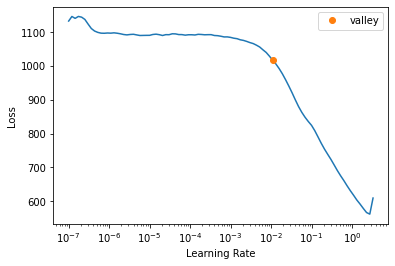

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   31.50      37.52
1   31.70      32.83
2   27.00      31.57
3   27.20      33.80
4   33.60      34.76
XGBoost RMSE:  4.3113103


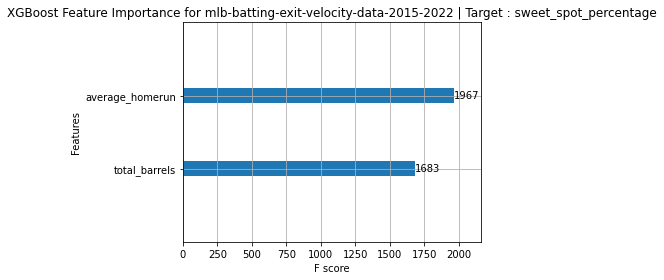

Target Variable: launch_angle
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'batted_ball_events', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'batted_ball_events', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983


  7%|▋         | 3/42 [00:00<00:01, 27.98it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.0715911228425532, 'Adjusted R-Squared': 0.06686639573233721, 'RMSE': 4.156353408135296, 'Time taken': 0.04746079444885254}
{'Model': 'BaggingRegressor', 'R-Squared': -0.32230214374303556, 'Adjusted R-Squared': -0.32903141673918324, 'RMSE': 4.960302662744614, 'Time taken': 0.04891777038574219}
{'Model': 'BayesianRidge', 'R-Squared': 0.09535036431953026, 'Adjusted R-Squared': 0.09074654937968063, 'RMSE': 4.102825366335331, 'Time taken': 0.010521411895751953}


 17%|█▋        | 7/42 [00:00<00:01, 32.60it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.8139581270061573, 'Adjusted R-Squared': -0.8231894660748909, 'RMSE': 5.8097367543937875, 'Time taken': 0.016977548599243164}
{'Model': 'DummyRegressor', 'R-Squared': -0.0026945035226493275, 'Adjusted R-Squared': -0.007797274532942655, 'RMSE': 4.319437, 'Time taken': 0.010923624038696289}
{'Model': 'ElasticNet', 'R-Squared': 0.053233726888856414, 'Adjusted R-Squared': 0.048415577916280705, 'RMSE': 4.197243980211277, 'Time taken': 0.010622024536132812}
{'Model': 'ElasticNetCV', 'R-Squared': 0.09541933971436056, 'Adjusted R-Squared': 0.09081587579433192, 'RMSE': 4.102668952524472, 'Time taken': 0.07164716720581055}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.8199905782522068, 'Adjusted R-Squared': -0.8292526168183756, 'RMSE': 5.819389089733135, 'Time taken': 0.015074491500854492}
{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.5120087683523733, 'Adjusted R-Squared': -0.5197034694635811, 'RMSE': 5.304201090453785, 'Time taken': 0.2398

 26%|██▌       | 11/42 [00:00<00:03, 10.01it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -376538.75688605144, 'Adjusted R-Squared': -378454.98974552244, 'RMSE': 2646.9652789321713, 'Time taken': 0.4298226833343506}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.060888364159813246, 'Adjusted R-Squared': 0.05610917008429073, 'RMSE': 4.180242115688693, 'Time taken': 0.02570343017578125}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.09699779637381445, 'Adjusted R-Squared': 0.09240236531210366, 'RMSE': 4.099087893962775, 'Time taken': 0.1482245922088623}


 33%|███▎      | 14/42 [00:01<00:03,  7.04it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.011228140924337437, 'Adjusted R-Squared': 0.006196223066446072, 'RMSE': 4.289343970043144, 'Time taken': 0.4930851459503174}
{'Model': 'HuberRegressor', 'R-Squared': 0.0980843949688337, 'Adjusted R-Squared': 0.09349449367096518, 'RMSE': 4.096620898949554, 'Time taken': 0.01812124252319336}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.1466592112832632, 'Adjusted R-Squared': -0.15249462711676576, 'RMSE': 4.6191278, 'Time taken': 0.014362812042236328}


 45%|████▌     | 19/42 [00:02<00:02,  8.54it/s]

{'Model': 'KernelRidge', 'R-Squared': -8.275731600561057, 'Adjusted R-Squared': -8.322936341530832, 'RMSE': 13.137626548370685, 'Time taken': 0.33519887924194336}
{'Model': 'Lars', 'R-Squared': 0.09562660161923209, 'Adjusted R-Squared': 0.0910241924671672, 'RMSE': 4.102198913901698, 'Time taken': 0.04526948928833008}
{'Model': 'LarsCV', 'R-Squared': 0.09562660161923209, 'Adjusted R-Squared': 0.0910241924671672, 'RMSE': 4.102198913901698, 'Time taken': 0.06274986267089844}
{'Model': 'Lasso', 'R-Squared': 0.03580885136345213, 'Adjusted R-Squared': 0.03090202617955118, 'RMSE': 4.235692225197586, 'Time taken': 0.013265132904052734}


 50%|█████     | 21/42 [00:02<00:02,  9.89it/s]

{'Model': 'LassoCV', 'R-Squared': 0.0955518276974251, 'Adjusted R-Squared': 0.09094903801649601, 'RMSE': 4.102368496046277, 'Time taken': 0.08810186386108398}
{'Model': 'LassoLars', 'R-Squared': -0.0026945145882857346, 'Adjusted R-Squared': -0.007797285654892683, 'RMSE': 4.319437010563398, 'Time taken': 0.013058900833129883}
{'Model': 'LassoLarsCV', 'R-Squared': 0.09562660161923209, 'Adjusted R-Squared': 0.0910241924671672, 'RMSE': 4.102198913901698, 'Time taken': 0.02137017250061035}
{'Model': 'LassoLarsIC', 'R-Squared': 0.09562660161923209, 'Adjusted R-Squared': 0.0910241924671672, 'RMSE': 4.102198913901698, 'Time taken': 0.013059139251708984}
{'Model': 'LinearRegression', 'R-Squared': 0.09562660161923209, 'Adjusted R-Squared': 0.0910241924671672, 'RMSE': 4.102198913901698, 'Time taken': 0.012453317642211914}
{'Model': 'LinearSVR', 'R-Squared': 0.09793333212851074, 'Adjusted R-Squared': 0.09334266206300701, 'RMSE': 4.096963958363643, 'Time taken': 0.014101982116699219}


 64%|██████▍   | 27/42 [00:06<00:05,  2.57it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.10172463856574665, 'Adjusted R-Squared': 0.0971532626805851, 'RMSE': 4.088345304352563, 'Time taken': 3.8518965244293213}


 69%|██████▉   | 29/42 [00:06<00:04,  2.97it/s]

{'Model': 'NuSVR', 'R-Squared': 0.11327051255773612, 'Adjusted R-Squared': 0.10875789430103255, 'RMSE': 4.061985801660219, 'Time taken': 0.22749876976013184}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.08067194525953902, 'Adjusted R-Squared': 0.07599343098605071, 'RMSE': 4.135976689342147, 'Time taken': 0.011580467224121094}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.09562660161923209, 'Adjusted R-Squared': 0.0910241924671672, 'RMSE': 4.102198913901698, 'Time taken': 0.02016448974609375}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.014006571998617323, 'Adjusted R-Squared': -0.019166910787414393, 'RMSE': 4.343733882815655, 'Time taken': 0.011887550354003906}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': -0.12001135522925588, 'Adjusted R-Squared': -0.1257111585637558, 'RMSE': 4.565139346781139, 'Time taken': 0.037287235260009766}


 81%|████████  | 34/42 [00:06<00:01,  4.33it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.28157449822841585, 'Adjusted R-Squared': -0.28809650585298785, 'RMSE': 4.883315163790914, 'Time taken': 0.3332374095916748}
{'Model': 'Ridge', 'R-Squared': 0.0956102047779599, 'Adjusted R-Squared': 0.09100771218141013, 'RMSE': 4.10223610141722, 'Time taken': 0.016598224639892578}
{'Model': 'RidgeCV', 'R-Squared': 0.09545847975937338, 'Adjusted R-Squared': 0.09085521502532445, 'RMSE': 4.102580192952457, 'Time taken': 0.011697053909301758}
{'Model': 'SGDRegressor', 'R-Squared': 0.09580711981040124, 'Adjusted R-Squared': 0.09120562932597587, 'RMSE': 4.101789482086327, 'Time taken': 0.012868881225585938}


 98%|█████████▊| 41/42 [00:07<00:00,  7.11it/s]

{'Model': 'SVR', 'R-Squared': 0.10286087913110087, 'Adjusted R-Squared': 0.09829528564067391, 'RMSE': 4.085758784729117, 'Time taken': 0.17640447616577148}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.09562660161923209, 'Adjusted R-Squared': 0.0910241924671672, 'RMSE': 4.102198913901698, 'Time taken': 0.012279033660888672}
{'Model': 'TweedieRegressor', 'R-Squared': 0.060888364159813246, 'Adjusted R-Squared': 0.05610917008429073, 'RMSE': 4.180242115688693, 'Time taken': 0.011776447296142578}
{'Model': 'XGBRegressor', 'R-Squared': -0.26180445644749395, 'Adjusted R-Squared': -0.26822585317241754, 'RMSE': 4.845503, 'Time taken': 0.10148763656616211}


100%|██████████| 42/42 [00:07<00:00,  5.80it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.01563613163536126, 'Adjusted R-Squared': 0.010626646300172293, 'RMSE': 4.279772243356095, 'Time taken': 0.12774205207824707}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: launch_angle
launch_angle
Target Standard Deviation: 4.6219401359558105
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
NuSVR                                        0.11       0.11    4.06   
SVR                                          0.10       0.10    4.09   
MLPRegressor                                 0.10       0.10    4.09   
HuberRegressor                               0.09       0.10    4.10   
LinearSVR                                    0.09       0.10    4.10   
GradientBoostingRegressor                    0.09       0.10    4.10   
SGDRegressor                                 0.09       0.10    4.10   
OrthogonalMatc

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,81.461342,61.497219,7.842016,00:01
1,52.748928,46.969505,6.853430,00:01
2,38.495747,28.352596,5.324715,00:01
3,32.710793,19.123917,4.373090,00:01
4,28.883926,19.785837,4.448127,00:01


Better model found at epoch 0 with _rmse value: 7.842015743255615.
Better model found at epoch 1 with _rmse value: 6.853430271148682.
Better model found at epoch 2 with _rmse value: 5.3247151374816895.
Better model found at epoch 3 with _rmse value: 4.3730902671813965.
No improvement since epoch 3: early stopping


,average_homerun,total_barrels,launch_angle,launch_angle_pred
0,15.00,1.00,8.20,13.27
1,39.00,11.00,11.50,11.65
2,54.00,44.00,9.70,11.62
3,48.00,18.00,21.60,12.06
4,38.00,28.00,14.80,11.69
5,33.00,43.00,9.90,11.38
6,28.00,14.00,13.60,11.62
7,58.00,23.00,23.10,12.22
8,58.00,5.00,6.80,11.89


<Figure size 432x288 with 0 Axes>

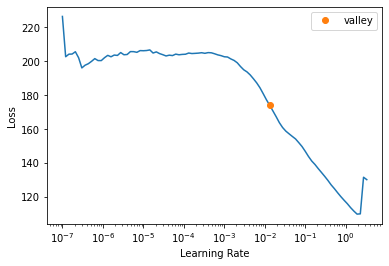

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   24.50      13.71
1   13.10      15.61
2   19.50      15.70
3   14.40       8.71
4   11.10      13.47
XGBoost RMSE:  4.836824


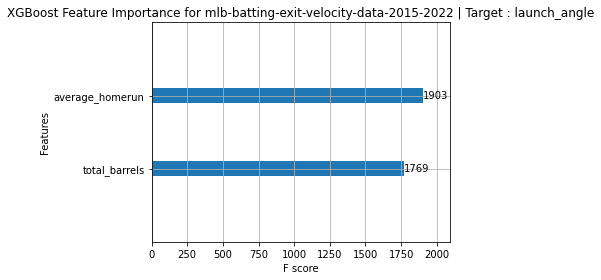

Target Variable: batted_ball_events
CATS=====================
['average_homerun', 'total_barrels']
CONTS=====================
['rank', 'player', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
17
Could not convert player to float.
Looping through continuous variables to find breakpoint
Error with  player
Continuous variables that made the cut : ['rank', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']
Categorical variables that made the cut : ['average_homerun', 'total_barrels']
Tabular Object size: 1983


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.22589454979166623, 'Adjusted R-Squared': 0.22195508185167478, 'RMSE': 101.31438723220457, 'Time taken': 0.048360586166381836}
{'Model': 'BaggingRegressor', 'R-Squared': -0.012684417395606662, 'Adjusted R-Squared': -0.017838027662250955, 'RMSE': 115.87990304612302, 'Time taken': 0.047893524169921875}


 17%|█▋        | 7/42 [00:00<00:01, 32.24it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.20279121009224654, 'Adjusted R-Squared': 0.1987341679044209, 'RMSE': 102.81514651794328, 'Time taken': 0.012271881103515625}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.27656122050812404, 'Adjusted R-Squared': -0.2830577152689795, 'RMSE': 130.10436971446848, 'Time taken': 0.016214609146118164}
{'Model': 'DummyRegressor', 'R-Squared': -0.003353055250802761, 'Adjusted R-Squared': -0.008459177669381868, 'RMSE': 115.34478, 'Time taken': 0.009839057922363281}
{'Model': 'ElasticNet', 'R-Squared': 0.16616131544489743, 'Adjusted R-Squared': 0.16191786157947707, 'RMSE': 105.15067848135126, 'Time taken': 0.010675430297851562}
{'Model': 'ElasticNetCV', 'R-Squared': 0.20339440194954517, 'Adjusted R-Squared': 0.19934042944038255, 'RMSE': 102.77624266023547, 'Time taken': 0.0746161937713623}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.28092331449671626, 'Adjusted R-Squared': -0.28744200820916777, 'RMSE': 130.3264677567521, 'Time taken': 0.01382851

 26%|██▌       | 11/42 [00:00<00:03,  9.98it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -45090.92326958866, 'Adjusted R-Squared': -45320.39870607512, 'RMSE': 24452.34074864499, 'Time taken': 0.4206223487854004}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.1310659513079966, 'Adjusted R-Squared': 0.1266438950805564, 'RMSE': 107.34071086002032, 'Time taken': 0.025494098663330078}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.17515663904644885, 'Adjusted R-Squared': 0.1709589629092807, 'RMSE': 104.58196584514936, 'Time taken': 0.1507716178894043}


 33%|███▎      | 14/42 [00:01<00:03,  7.21it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.16365188597215619, 'Adjusted R-Squared': 0.15939566147328676, 'RMSE': 105.30878459198563, 'Time taken': 0.4606468677520752}
{'Model': 'HuberRegressor', 'R-Squared': 0.1953537688691357, 'Adjusted R-Squared': 0.19125887710765554, 'RMSE': 103.29363245164004, 'Time taken': 0.021196365356445312}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.11845119820051964, 'Adjusted R-Squared': 0.11396494475624752, 'RMSE': 108.11706, 'Time taken': 0.015214204788208008}


 45%|████▌     | 19/42 [00:01<00:02,  9.23it/s]

{'Model': 'KernelRidge', 'R-Squared': -8.426108482466795, 'Adjusted R-Squared': -8.474078500189272, 'RMSE': 353.5389569659412, 'Time taken': 0.2573699951171875}
{'Model': 'Lars', 'R-Squared': 0.20268665356638071, 'Adjusted R-Squared': 0.19862907928427587, 'RMSE': 102.82188856733568, 'Time taken': 0.04293060302734375}
{'Model': 'LarsCV', 'R-Squared': 0.20268665356638071, 'Adjusted R-Squared': 0.19862907928427587, 'RMSE': 102.82188856733568, 'Time taken': 0.05453824996948242}
{'Model': 'Lasso', 'R-Squared': 0.2035020079993839, 'Adjusted R-Squared': 0.1994485831037065, 'RMSE': 102.7693008818835, 'Time taken': 0.014954566955566406}


 50%|█████     | 21/42 [00:02<00:02, 10.45it/s]

{'Model': 'LassoCV', 'R-Squared': 0.2027373489325538, 'Adjusted R-Squared': 0.1986800326421343, 'RMSE': 102.81861966673642, 'Time taken': 0.09062528610229492}
{'Model': 'LassoLars', 'R-Squared': 0.035960501773464104, 'Adjusted R-Squared': 0.03105444834737492, 'RMSE': 113.06247117717382, 'Time taken': 0.013112068176269531}
{'Model': 'LassoLarsCV', 'R-Squared': 0.20268665356638071, 'Adjusted R-Squared': 0.19862907928427587, 'RMSE': 102.82188856733568, 'Time taken': 0.021811485290527344}
{'Model': 'LassoLarsIC', 'R-Squared': 0.20268665356638071, 'Adjusted R-Squared': 0.19862907928427587, 'RMSE': 102.82188856733568, 'Time taken': 0.01298213005065918}
{'Model': 'LinearRegression', 'R-Squared': 0.20268665356638083, 'Adjusted R-Squared': 0.19862907928427598, 'RMSE': 102.82188856733566, 'Time taken': 0.011448144912719727}
{'Model': 'LinearSVR', 'R-Squared': 0.11967229215766839, 'Adjusted R-Squared': 0.11519225293200774, 'RMSE': 108.04215676981809, 'Time taken': 0.01399374008178711}


 64%|██████▍   | 27/42 [00:06<00:05,  2.54it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.29565693514758085, 'Adjusted R-Squared': -0.30225060911779744, 'RMSE': 131.0738546610354, 'Time taken': 3.9235401153564453}


 69%|██████▉   | 29/42 [00:06<00:04,  2.97it/s]

{'Model': 'NuSVR', 'R-Squared': 0.18364591878286352, 'Adjusted R-Squared': 0.17949144508710202, 'RMSE': 104.04239566121895, 'Time taken': 0.20529627799987793}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.1487679047808409, 'Adjusted R-Squared': 0.14443593483061623, 'RMSE': 106.24171056749584, 'Time taken': 0.012289285659790039}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.20268665356638071, 'Adjusted R-Squared': 0.19862907928427587, 'RMSE': 102.82188856733568, 'Time taken': 0.0184173583984375}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.1540459525681097, 'Adjusted R-Squared': 0.14974084291196788, 'RMSE': 105.9118235943436, 'Time taken': 0.011801481246948242}
{'Model': 'PoissonRegressor', 'R-Squared': 0.1917724029162602, 'Adjusted R-Squared': 0.18765928537384935, 'RMSE': 103.52324987145244, 'Time taken': 0.013629436492919922}
{'Model': 'RANSACRegressor', 'R-Squared': 0.017102708758252816, 'Adjusted R-Squared': 0.012100686919872539, 'RMSE': 114.1629358200894

 81%|████████  | 34/42 [00:06<00:01,  4.35it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.053421010452445294, 'Adjusted R-Squared': 0.04860381457688523, 'RMSE': 112.03390911983233, 'Time taken': 0.3173527717590332}
{'Model': 'Ridge', 'R-Squared': 0.20271463387405753, 'Adjusted R-Squared': 0.19865720198537595, 'RMSE': 102.82008437496134, 'Time taken': 0.014191150665283203}
{'Model': 'RidgeCV', 'R-Squared': 0.20271463387404887, 'Adjusted R-Squared': 0.19865720198536718, 'RMSE': 102.82008437496191, 'Time taken': 0.011385917663574219}
{'Model': 'SGDRegressor', 'R-Squared': 0.20226681110635392, 'Adjusted R-Squared': 0.19820710022139898, 'RMSE': 102.84895654094936, 'Time taken': 0.01222991943359375}


 98%|█████████▊| 41/42 [00:07<00:00,  7.19it/s]

{'Model': 'SVR', 'R-Squared': 0.1892704943375555, 'Adjusted R-Squared': 0.18514464443596546, 'RMSE': 103.68335673755757, 'Time taken': 0.16370558738708496}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.20268665356638083, 'Adjusted R-Squared': 0.19862907928427598, 'RMSE': 102.82188856733566, 'Time taken': 0.013985872268676758}
{'Model': 'TweedieRegressor', 'R-Squared': 0.1310659513079966, 'Adjusted R-Squared': 0.1266438950805564, 'RMSE': 107.34071086002032, 'Time taken': 0.011681318283081055}
{'Model': 'XGBRegressor', 'R-Squared': 0.025481220552981076, 'Adjusted R-Squared': 0.020521837451469627, 'RMSE': 113.675316, 'Time taken': 0.10027408599853516}


100%|██████████| 42/42 [00:07<00:00,  5.87it/s]


{'Model': 'LGBMRegressor', 'R-Squared': 0.15173925026406987, 'Adjusted R-Squared': 0.14742240166490483, 'RMSE': 106.05612264585294, 'Time taken': 0.12961149215698242}
Project: mlb-batting-exit-velocity-data-2015-2022
mlb-batting-exit-velocity-data-2015-2022
Target: batted_ball_events
batted_ball_events
Target Standard Deviation: 112.82653045654297
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
AdaBoostRegressor                            0.22       0.23   101.31   
Lasso                                        0.20       0.20   102.77   
ElasticNetCV                                 0.20       0.20   102.78   
BayesianRidge                                0.20       0.20   102.82   
LassoCV                                      0.20       0.20   102.82   
Ridge                                        0.20       0.20   102.82   
RidgeCV                                      0.20       0.20   102

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,114262.148438,119463.507812,345.634888,00:01
1,89608.109375,57663.796875,240.132874,00:01
2,52944.953125,42316.910156,205.710754,00:01
3,35110.125000,19490.833984,139.609573,00:01
4,25688.322266,22440.968750,149.803101,00:01


Better model found at epoch 0 with _rmse value: 345.6348876953125.
Better model found at epoch 1 with _rmse value: 240.13287353515625.
Better model found at epoch 2 with _rmse value: 205.71075439453125.
Better model found at epoch 3 with _rmse value: 139.6095733642578.
No improvement since epoch 3: early stopping


,average_homerun,total_barrels,batted_ball_events,batted_ball_events_pred
0,44.00,36.00,341.00,324.17
1,53.00,55.00,396.00,277.09
2,51.00,20.00,134.00,247.78
3,34.00,15.00,369.00,325.97
4,45.00,10.00,225.00,251.36
5,36.00,33.00,262.00,300.95
6,32.00,4.00,307.00,246.63
7,42.00,42.00,496.00,253.71
8,47.00,25.00,324.00,268.13


<Figure size 432x288 with 0 Axes>

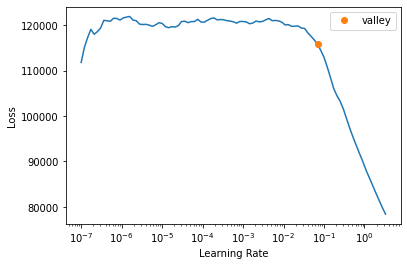

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  418.00     333.61
1  293.00     308.78
2  392.00     311.36
3  314.00     358.09
4  424.00     347.08
XGBoost RMSE:  113.6749


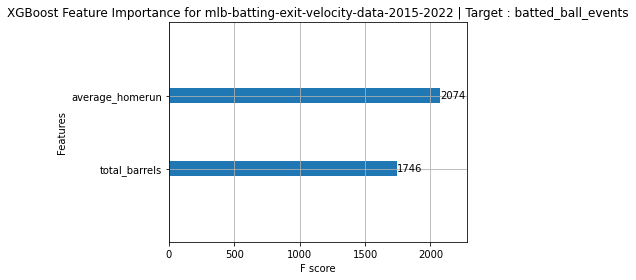

<Figure size 432x288 with 0 Axes>

In [16]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')


if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string():
            df[col + '_no_percent'] = df[col].str.replace('%', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

           feature  importance
0    total_barrels        2076
1  average_homerun        2006
0    total_barrels        1807
1  average_homerun        1794
0    total_barrels        1632


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

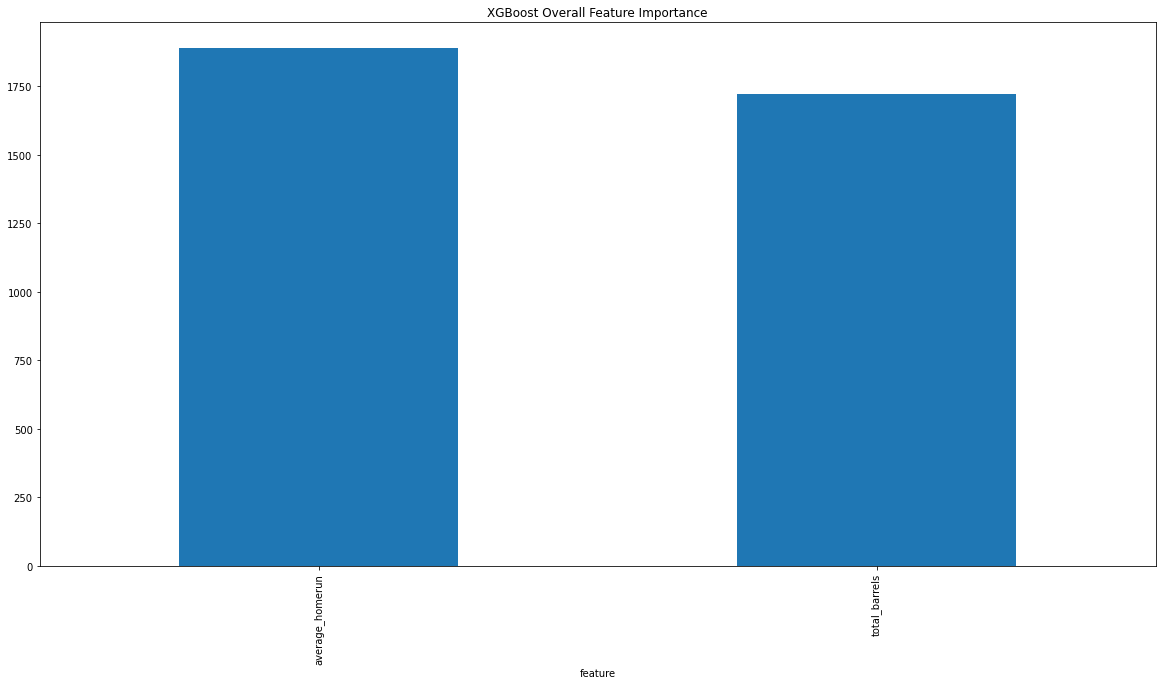

In [17]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [18]:
df.isna().sum()

rank                                   0
player                                 0
batted_ball_events                     0
launch_angle                           0
sweet_spot_percentage                  0
max_ev                                 0
average_ev                             0
fly_ball_line_drive_ev                 0
ground_ball_ev                         0
max_distance                           0
average_distance                       0
average_homerun                        0
hard_hit_95mph+                        0
hard_hit_percentage                    0
hard_hit_swing_percentage              0
total_barrels                          0
barrels_batted_balls_percentage        0
barrels_plate_appearance_percentage    0
dtype: int64

# **To Be Continued...**